In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm

# Read data

In [2]:
dir_name = f"fit_models_py_raraki_2023-11-14_global"
# dir_name = f"fit_models_py_raraki_2023-10-26_CONUS"
data_dir = "/home/raraki/waves/projects/smap-drydown/data"
datarod_dir = "datarods"
anc_dir = "SMAP_L1_L3_ANC_STATIC"
anc_file = "anc_info.csv"
IGBPclass_file = "IGBP_class.csv"
ai_file = "AridityIndex_from_datarods.csv"

In [3]:
input_file = rf"/home/raraki/waves/projects/smap-drydown/output/{dir_name}/all_results.csv"
_df = pd.read_csv(input_file)
coord_info_file = "/home/raraki/waves/projects/smap-drydown/data/datarods/coord_info.csv"
coord_info = pd.read_csv(coord_info_file)
df = _df.merge(coord_info, on=['EASE_row_index', 'EASE_column_index'], how='left')
print(len(df))
df.head()

711355


Unnamed: 0  EASE_row_index  EASE_column_index event_start   event_end  \
0           0               6                734  2015-07-07  2015-07-12   
1           0               7                729  2015-06-18  2015-06-25   
2           1               7                729  2018-06-21  2018-06-25   
3           2               7                729  2018-10-06  2018-10-09   
4           0               7                730  2018-10-06  2018-10-09   

                time                                                 sm  \
0      [0 1 2 3 4 5]  [0.32179025 0.2599923  0.23209431 0.20598999 0...   
1  [0 1 2 3 4 5 6 7]  [0.36692417 0.28546262 0.28856836 0.24865713 0...   
2        [0 1 2 3 4]  [0.22820515 0.2258285  0.22212438 0.21292772 0...   
3          [0 1 2 3]      [0.34508562 0.31701444 0.27699527 0.25584398]   
4          [0 1 2 3]      [0.3226049  0.29678289 0.27696453 0.27455859]   

     min_sm    max_sm       pet  ...  exp_r_squared  \
0  0.096700  0.362304  1.377396  ...       0.982862   
1  0.091342  0.405739  1.697854  ...       0.912102   
2  0.091342  0.405739  2.443372  ...       0.899777   
3  0.091342  0.405739  0.260681  ...       0.985895   
4  0.093141  0.395012  0.235150  ...       0.987813   

                                           exp_y_opt       q_k           q_q  \
0  [0.32250446557726625, 0.2587559415704793, 0.22...  0.910968  3.749469e+00   
1  [0.35736918971117526, 0.30813795196043503, 0.2...  1.633520  6.368222e+00   
2  [0.23049376166928182, 0.22385820760844974, 0.2...  0.017996  4.832267e-14   
3  [0.3478092642060949, 0.31004886459422476, 0.28...  0.129883  6.682061e-01   
4  [0.3230287945363535, 0.2946931871117907, 0.280...  1.199170  7.459337e+00   

  q_delta_theta  q_r_squared  \
0      0.849442     0.971188   
1      0.875518     0.953002   
2      0.442321     0.948290   
3      0.811438     0.989966   
4      0.760860     0.982111   

                                             q_y_opt    id  latitude longitude  
0  [0.3223150955063468, 0.2560997450368923, 0.230...  6518  74.71601  94.29461  
1  [0.366601946537305, 0.2931281623855699, 0.2719...  7477  73.69126  92.42738  
2  [0.23040626100336323, 0.2247482585022064, 0.21...  7477  73.69126  92.42738  
3  [0.34645539673350567, 0.31256765751303484, 0.2...  7477  73.69126  92.42738  
4  [0.3228222749950458, 0.2946914559750161, 0.281...  7478  73.69126  92.80083  

[5 rows x 23 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'EASE_row_index', 'EASE_column_index', 'event_start',
       'event_end', 'time', 'sm', 'min_sm', 'max_sm', 'pet', 'exp_delta_theta',
       'exp_theta_w', 'exp_tau', 'exp_r_squared', 'exp_y_opt', 'q_k', 'q_q',
       'q_delta_theta', 'q_r_squared', 'q_y_opt', 'id', 'latitude',
       'longitude'],
      dtype='object')

In [5]:
file = os.path.join(data_dir, datarod_dir, anc_file)
df_anc = pd.read_csv(file).drop(["spatial_ref", "latitude", "longitude"], axis=1)
df_anc.loc[df_anc["sand_fraction"] < 0, "sand_fraction"] = np.nan
df_anc.head()

sand_fraction  IGBP_landcover  EASE_column_index  EASE_row_index
0            NaN               0                  0               0
1            NaN               0                  1               0
2            NaN               0                  2               0
3            NaN               0                  3               0
4            NaN               0                  4               0

In [6]:
file = os.path.join(data_dir, datarod_dir, ai_file)
df_ai = pd.read_csv(file).drop(["latitude", "longitude"], axis=1)
df_ai.loc[df_ai["AI"] < 0, "AI"] = np.nan
df_ai.head()

id  EASE_row_index  EASE_column_index   AI
0   0               0                  0  0.0
1   1               0                  1  0.0
2   2               0                  2  0.0
3   3               0                  3  0.0
4   4               0                  4  0.0

In [7]:
file = os.path.join(data_dir, anc_dir, IGBPclass_file)
IGBPclass = pd.read_csv(file)
IGBPclass

class                                 name  \
0       0                           Open water   
1       1         Evergreen needleleaf forests   
2       2          Evergreen broadleaf forests   
3       3         Deciduous needleleaf forests   
4       4          Deciduous broadleaf forests   
5       5                        Mixed forests   
6       6                    Closed shrublands   
7       7                      Open shrublands   
8       8                       Woody savannas   
9       9                             Savannas   
10     10                           Grasslands   
11     11                   Permanent wetlands   
12     12                            Croplands   
13     13                   Urban and built-up   
14     14  Cropland/natural vegetation mosaics   
15     15                         Snow and ice   
16     16                               Barren   
17     17                         Water bodies   

                                          description abbreviation  
0                                          Open water           OW  
1   Lands dominated by needleleaf woody vegetation...          ENF  
2   Lands dominated by broadleaf woody vegetation ...          EBF  
3   Lands dominated by woody vegetation with a per...          DNF  
4   Lands dominated by woody vegetation with a per...          DBF  
5   Lands dominated by trees with a percent cover ...           MF  
6   Lands with woody vegetation less than 2 m tall...          CSH  
7   Lands with woody vegetation less than 2 m tall...          OSH  
8   Lands with herbaceous and other understory sys...          WSA  
9   Lands with herbaceous and other understory sys...          SAV  
10  Lands with herbaceous types of cover. Tree and...          GRA  
11  Lands with a permanent mixture of water and he...          WET  
12  Lands covered with temporary crops followed by...          CRO  
13  Land covered by buildings and other man-made s...           UA  
14  Lands with a mosaic of croplands, forests, shr...          CNM  
15    Lands under snow/ice cover throughout the year.           SI  
16  Lands with exposed soil, sand, rocks, or snow ...          BAR  
17  Oceans, seas, lakes, reservoirs, and rivers. C...           WB

In [8]:
df = df.merge(df_anc, on=['EASE_row_index', 'EASE_column_index'], how='left')
df = df.merge(df_ai, on=['EASE_row_index', 'EASE_column_index'], how='left')
df = pd.merge(df, IGBPclass, left_on='IGBP_landcover', right_on='class', how='left')
print(len(df))
df.head()

711355


Unnamed: 0  EASE_row_index  EASE_column_index event_start   event_end  \
0           0               6                734  2015-07-07  2015-07-12   
1           0               7                729  2015-06-18  2015-06-25   
2           1               7                729  2018-06-21  2018-06-25   
3           2               7                729  2018-10-06  2018-10-09   
4           0               7                730  2018-10-06  2018-10-09   

                time                                                 sm  \
0      [0 1 2 3 4 5]  [0.32179025 0.2599923  0.23209431 0.20598999 0...   
1  [0 1 2 3 4 5 6 7]  [0.36692417 0.28546262 0.28856836 0.24865713 0...   
2        [0 1 2 3 4]  [0.22820515 0.2258285  0.22212438 0.21292772 0...   
3          [0 1 2 3]      [0.34508562 0.31701444 0.27699527 0.25584398]   
4          [0 1 2 3]      [0.3226049  0.29678289 0.27696453 0.27455859]   

     min_sm    max_sm       pet  ...  latitude  longitude  sand_fraction  \
0  0.096700  0.362304  1.377396  ...  74.71601   94.29461       0.271687   
1  0.091342  0.405739  1.697854  ...  73.69126   92.42738       0.418609   
2  0.091342  0.405739  2.443372  ...  73.69126   92.42738       0.418609   
3  0.091342  0.405739  0.260681  ...  73.69126   92.42738       0.418609   
4  0.093141  0.395012  0.235150  ...  73.69126   92.80083       0.539304   

   IGBP_landcover  id_y        AI  class             name  \
0              10  6518  3.014428     10       Grasslands   
1               7  7477  3.135106      7  Open shrublands   
2               7  7477  3.135106      7  Open shrublands   
3               7  7477  3.135106      7  Open shrublands   
4               7  7478  3.065100      7  Open shrublands   

                                         description abbreviation  
0  Lands with herbaceous types of cover. Tree and...          GRA  
1  Lands with woody vegetation less than 2 m tall...          OSH  
2  Lands with woody vegetation less than 2 m tall...          OSH  
3  Lands with woody vegetation less than 2 m tall...          OSH  
4  Lands with woody vegetation less than 2 m tall...          OSH  

[5 rows x 31 columns]

In [9]:
df = df.assign(_diff_R2=df["q_r_squared"] - df["exp_r_squared"])

In [10]:
filtered_df = df[df['q_r_squared'] >= 0.7].copy()
filtered_df2 = df[(df['q_r_squared'] >= 0.7) | (df['exp_r_squared'] >= 0.7)].copy()
filtered_df_expon = df[df['exp_r_squared'] >= 0.7].copy()

# Expon vs q model

/home/raraki/miniconda3/envs/SMAP/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/raraki/miniconda3/envs/SMAP/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


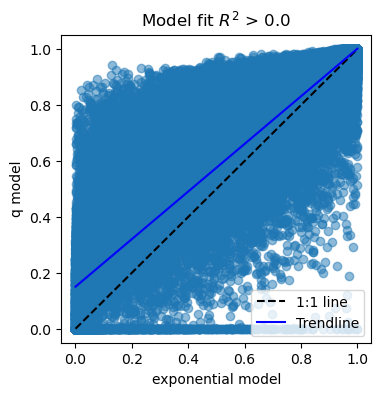

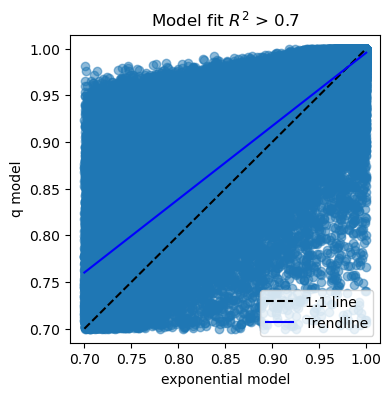

In [11]:
def plot_R2_models(R2_threshold):
    # Assuming you have a DataFrame named 'df' with columns 'exp_r_squared' and 'q_r_squared'
    # Replace 'df' with your actual DataFrame name

    x = df['exp_r_squared'].values
    y = df['q_r_squared'].values
    success_fit_idx = (x > R2_threshold) & (y > R2_threshold)

    # Create a scatter plot
    plt.figure(figsize=(4, 4))
    plt.scatter(x[success_fit_idx], y[success_fit_idx], alpha=0.5)  # alpha controls point transparency
    plt.title(f'Model fit $R^2$ > {R2_threshold}')
    plt.xlabel('exponential model')
    plt.ylabel('q model')
    plt.ylabel

    # Set the x and y-axis limits to the range [0.8, 1]
    plt.plot([R2_threshold, 1], [R2_threshold, 1], color='k', linestyle='--', label='1:1 line')

    # Add a trendline
    coefficients = np.polyfit(x[success_fit_idx], y[success_fit_idx], 1)
    trendline_x = np.array([R2_threshold, 1])
    trendline_y = coefficients[0] * trendline_x + coefficients[1]
    plt.plot(trendline_x, trendline_y, color='blue', label='Trendline')
    plt.legend()

plot_R2_models(R2_threshold=0.0)
plot_R2_models(R2_threshold=0.7)

# Plot longitudinal distribution (lat,lon)

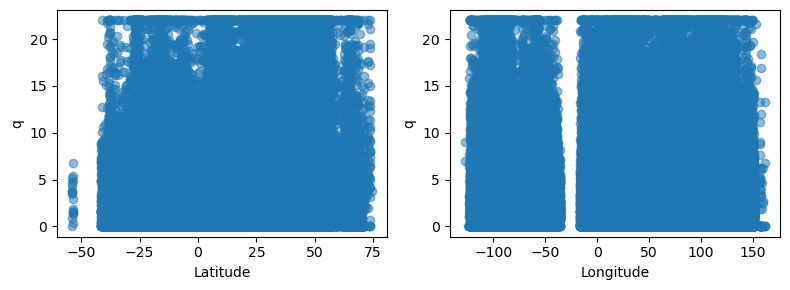

In [12]:
def plot_param_distribution(df=None, model_type=None, parameter=None):

    varname = f"{model_type}_{parameter}"
    # Create a figure and a 1x2 grid of subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))

    # Scatter plot for latitude vs. q
    axs[0].scatter(df['latitude'], df[varname], alpha=0.5)
    axs[0].set_xlabel('Latitude')
    axs[0].set_ylabel(f'{parameter}')

    # Scatter plot for longitude vs. q
    axs[1].scatter(df['longitude'], df[varname], alpha=0.5)
    axs[1].set_xlabel('Longitude')
    axs[1].set_ylabel(f'{parameter}')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_param_distribution(df=filtered_df, model_type="q", parameter="q")

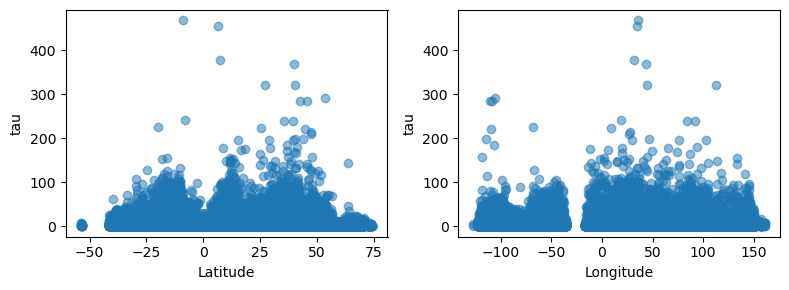

In [13]:
plot_param_distribution(df=filtered_df, model_type="exp", parameter="tau")

# Map plots

In [14]:
# Define the three colors in the colormap
import matplotlib.colors as mcolors
colors = ['#d8b365', '#f5f5f5', '#5ab4ac']

# Create a custom colormap
# cmap = mcolors.LinearSegmentedColormap.from_list('custom_BrBG', colors, N=256)
cmap = "BrBG"

In [15]:
def create_mean_dataarray(df=None, model_type=None, parameter=None):
    varname = f"{model_type}_{parameter}"
    mean_values = df.groupby(['latitude', 'longitude'])[varname].mean()
    data_array = mean_values.reset_index().pivot(index='latitude', columns='longitude', values=varname)
    return data_array

In [16]:
def plot_map(data_array=None, parameter=None, norm=None):
    # Create a figure and axes with Cartopy projection
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Create a grid of lat and lon coordinates
    lons, lats = np.meshgrid(data_array.columns, data_array.index)
    # Plot the heatmap using Cartopy
    im = ax.pcolormesh(lons, lats, data_array.values, norm=norm, cmap=cmap, transform=ccrs.PlateCarree(),) #, vmin=vmin, vmax=vmax)

    # Add coastlines
    ax.coastlines()

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', label=f'Mean {parameter}')
    cbar.ax.set_position([0.92, 0.1, 0.02, 0.8])
    
    # Set plot title and labels
    ax.set_title(f'Mean {parameter} per pixel')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    plt.show()
    plt.tight_layout()

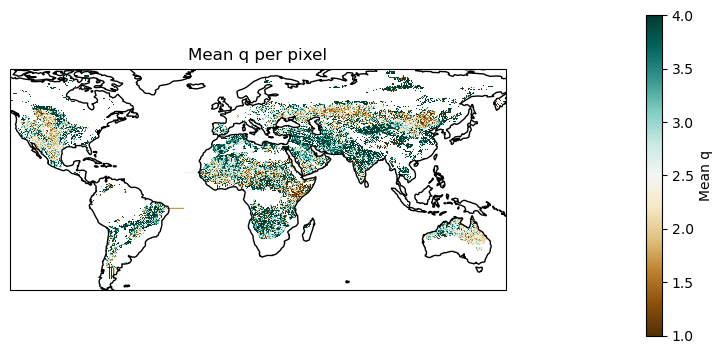

<Figure size 640x480 with 0 Axes>

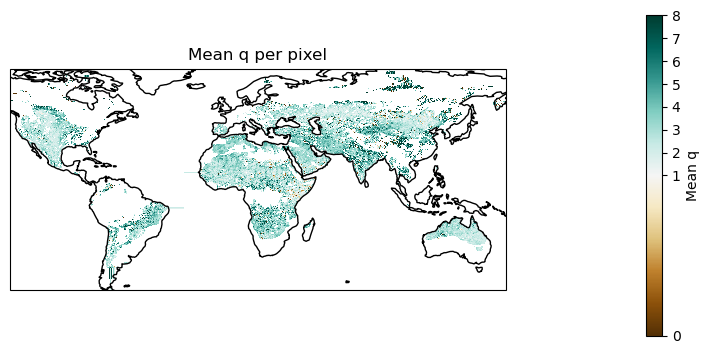

<Figure size 640x480 with 0 Axes>

In [17]:
da_q = create_mean_dataarray(df=filtered_df, model_type="q", parameter="q")

norm = TwoSlopeNorm(vmin=1, vcenter=2.5, vmax=4)
plot_map(data_array=da_q, parameter="q", norm=norm)
norm = TwoSlopeNorm(vmin=0, vcenter=1, vmax=8)
plot_map(data_array=da_q, parameter="q", norm=norm)

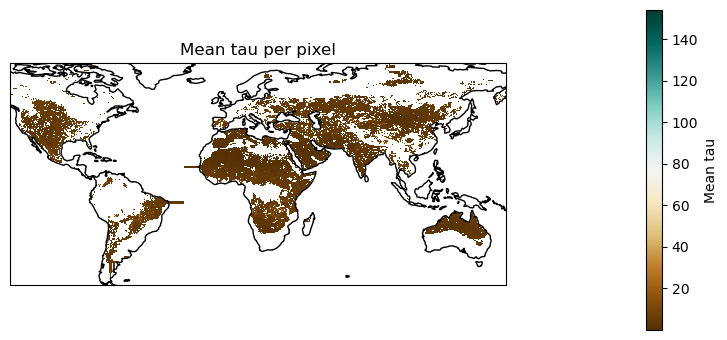

<Figure size 640x480 with 0 Axes>

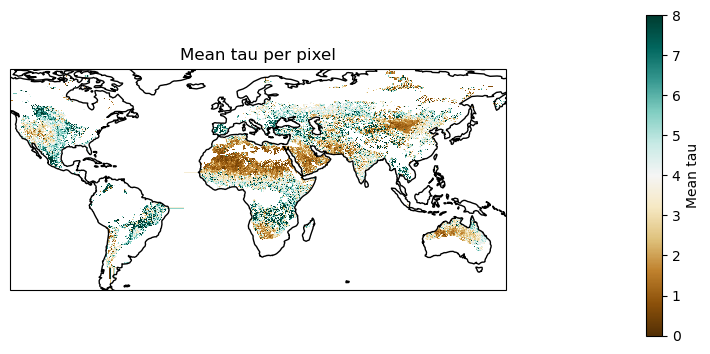

<Figure size 640x480 with 0 Axes>

In [18]:
da_q = create_mean_dataarray(df=filtered_df, model_type="exp", parameter="tau")
plot_map(data_array=da_q, parameter="tau")
norm = TwoSlopeNorm(vmin=0, vcenter=4, vmax=8)
plot_map(data_array=da_q, parameter="tau", norm=norm)

In [19]:
filtered_df["q_k_dernormalize"] = filtered_df["q_k"] * (filtered_df["max_sm"] - filtered_df["min_sm"])

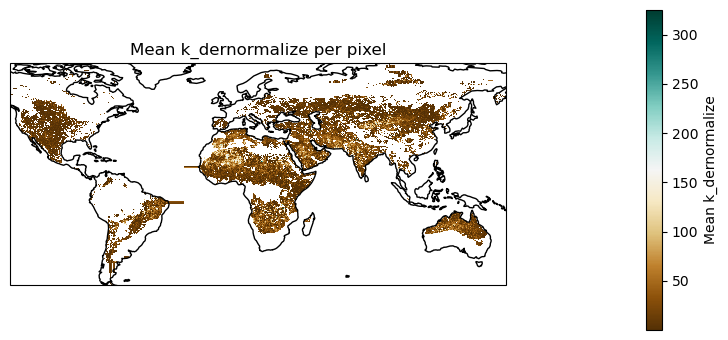

<Figure size 640x480 with 0 Axes>

In [20]:
da_knorm = create_mean_dataarray(df=filtered_df, model_type="q", parameter="k_dernormalize")
plot_map(data_array=da_knorm, parameter="k_dernormalize")

In [21]:
filtered_df["q_AET/PET"] = filtered_df["q_k_dernormalize"]/filtered_df["pet"]

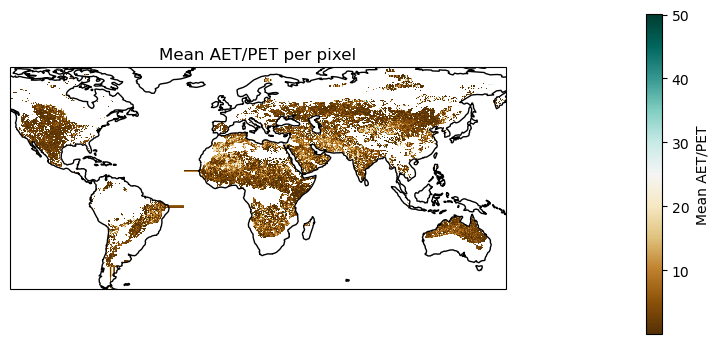

<Figure size 640x480 with 0 Axes>

In [22]:
da_AETfrac = create_mean_dataarray(df=filtered_df, model_type="q", parameter="AET/PET")
plot_map(data_array=da_AETfrac, parameter="AET/PET")

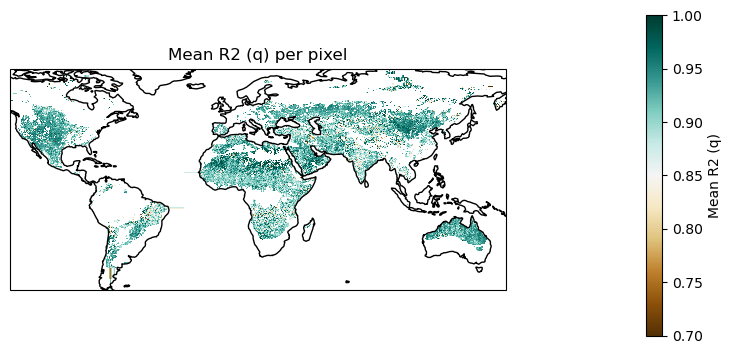

<Figure size 640x480 with 0 Axes>

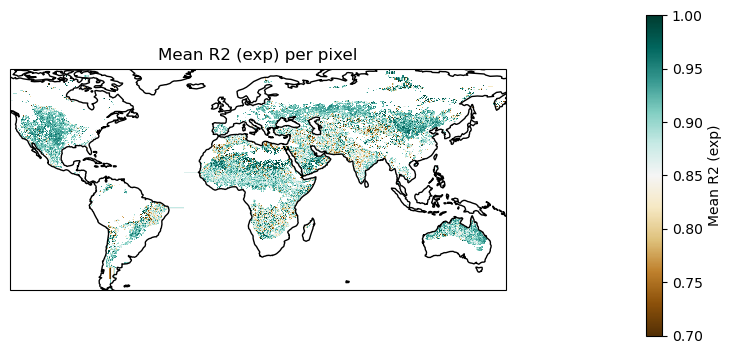

<Figure size 640x480 with 0 Axes>

In [23]:
norm = TwoSlopeNorm(vmin=0.7, vcenter=(0.7+1.0)/2, vmax=1.0)
da_R2_q = create_mean_dataarray(df=filtered_df2, model_type="q", parameter="r_squared")
plot_map(data_array=da_R2_q, parameter="R2 (q)", norm=norm)

da_R2_exp = create_mean_dataarray(df=filtered_df2, model_type="exp", parameter="r_squared")
plot_map(data_array=da_R2_exp, parameter="R2 (exp)", norm=norm)
# norm = TwoSlopeNorm(vmin=0, vcenter=1, vmax=8)
# plot_map(data_array=da_q, parameter="q", norm=norm)

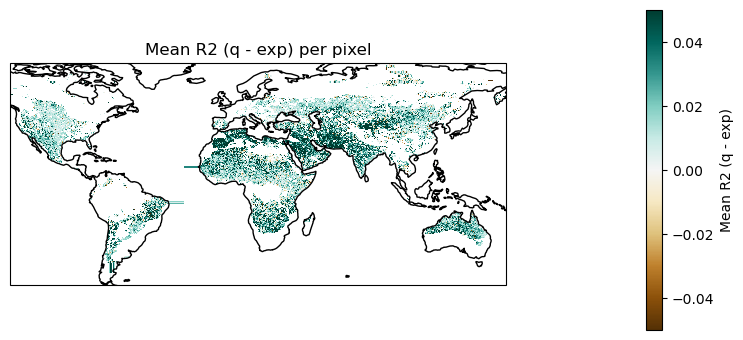

<Figure size 640x480 with 0 Axes>

In [24]:
norm = TwoSlopeNorm(vmin=-0.05, vcenter=0, vmax=0.05)
diff_R2 = create_mean_dataarray(df=filtered_df2, model_type="", parameter="diff_R2")
plot_map(data_array=diff_R2, parameter="R2 (q - exp)", norm=norm)

# Boxplot

In [25]:
import seaborn as sns

In [26]:
n_bins = 10
sand_bins = [i * 0.1 for i in range(11)]
ai_bins = [i * 0.25 for i in range(9)]
filtered_df['sand_bins'] = pd.cut(filtered_df['sand_fraction'], bins=sand_bins, include_lowest=True)
filtered_df['ai_bins'] = pd.cut(filtered_df['AI'], bins=ai_bins, include_lowest=True)

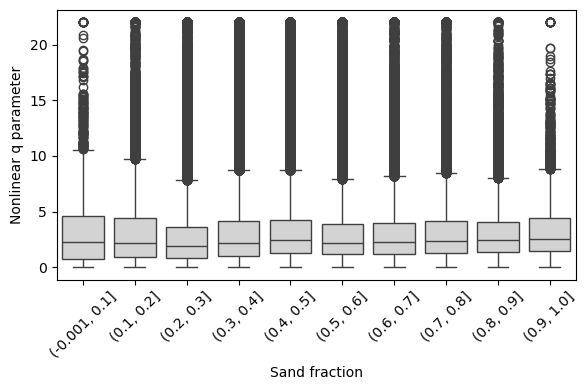

In [27]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='sand_bins', y='q_q', data=filtered_df, boxprops=dict(facecolor='lightgray'))
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("Sand fraction")
plt.tight_layout()

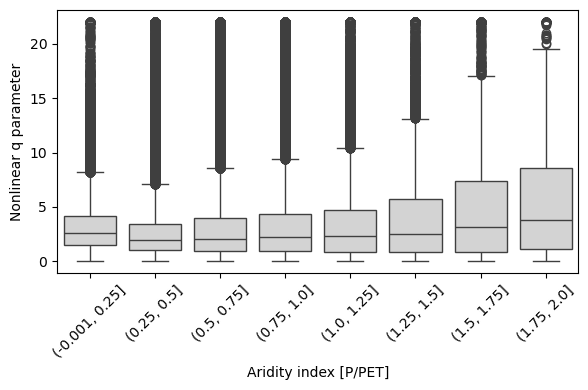

In [28]:
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x='ai_bins', y='q_q', data=filtered_df, boxprops=dict(facecolor='lightgray'))
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("Aridity index [P/PET]")
plt.tight_layout()

In [29]:
df.columns

Index(['Unnamed: 0', 'EASE_row_index', 'EASE_column_index', 'event_start',
       'event_end', 'time', 'sm', 'min_sm', 'max_sm', 'pet', 'exp_delta_theta',
       'exp_theta_w', 'exp_tau', 'exp_r_squared', 'exp_y_opt', 'q_k', 'q_q',
       'q_delta_theta', 'q_r_squared', 'q_y_opt', 'id_x', 'latitude',
       'longitude', 'sand_fraction', 'IGBP_landcover', 'id_y', 'AI', 'class',
       'name', 'description', 'abbreviation', '_diff_R2'],
      dtype='object')

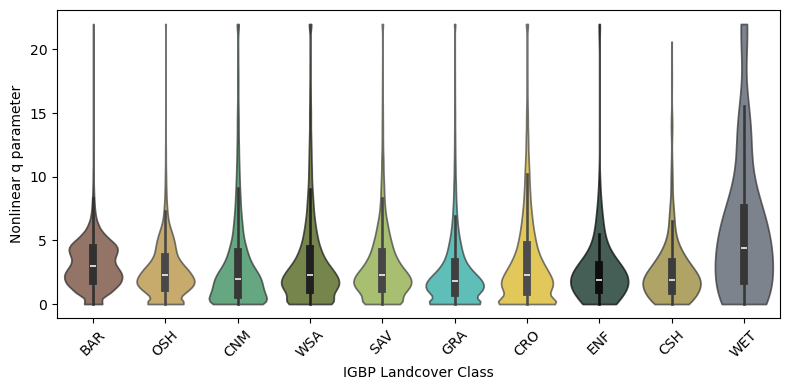

In [30]:
# Define the specific order for your categories.
vegetation_categories = ["BAR", "OSH", "CNM", "WSA", "SAV", "GRA", "CRO", "ENF", "CSH", "WET"]
colors = ["#7A422A", "#C99728", "#229954", "#4C6903", "#92BA31", "#13BFB2", "#F7C906", "#022E1F", "#A68F23", "#4D5A6B"]

# Create a color palette dictionary
palette_dict = dict(zip(vegetation_categories, colors))

fig, ax =  plt.subplots(figsize=(8, 4))
for i, category in enumerate(vegetation_categories):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    sns.violinplot(x='abbreviation', y='q_q', data=subset, order=[category], color=colors[i], ax=ax, alpha=0.75, cut=0)

# ax = sns.violinplot(x='abbreviation', y='q_q', data=filtered_df, order=vegetation_orders, palette=palette_dict) # boxprops=dict(facecolor='lightgray'), 
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("IGBP Landcover Class")
plt.tight_layout()

/tmp/ipykernel_2359117/1745212306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


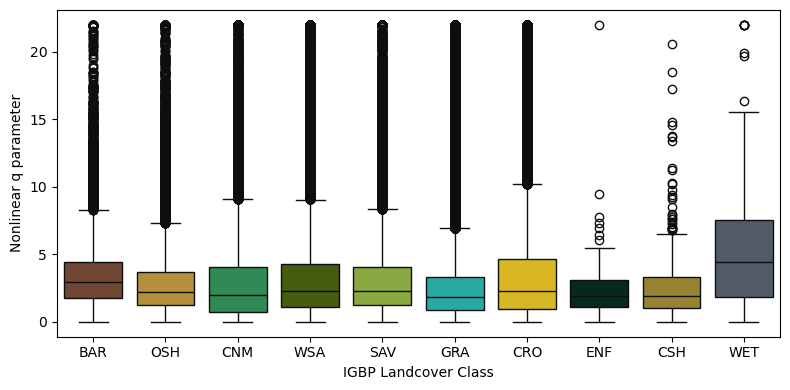

In [31]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the boxplot with specified colors and increased alpha
sns.boxplot(
    x='abbreviation',
    y='q_q',
    data=filtered_df,
    # hue = colors, 
    order=vegetation_categories,
    palette=colors,
    ax=ax
)

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor(mcolors.to_rgba((r, g, b), alpha=0.5))

# Optionally, adjust layout
plt.tight_layout()
ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("IGBP Landcover Class")
# Show the plot
plt.show()

# Vegetation deep dive

## R2 from q vs tau

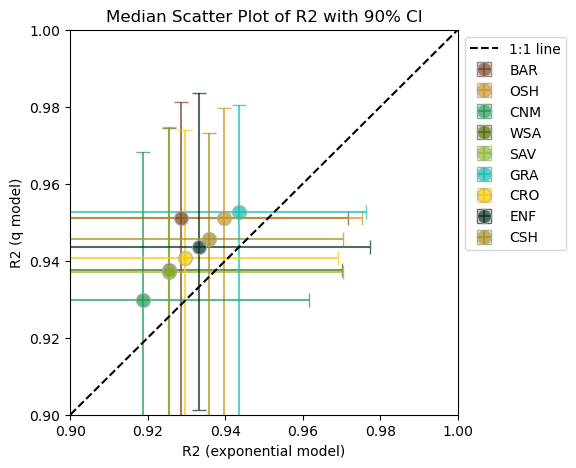

In [32]:
# Assuming 'df' is your DataFrame, 'vegetation_class' is your categorical column and 'value' is the numerical column.

# Set the figure size for better visibility
plt.figure(figsize=(5, 5))

# Get unique categories
categories = vegetation_categories

# Initialize a dictionary to store the medians and CIs
stats_dict = {}

# Calculate median and 90% confidence intervals for each vegetation class
for i, category in enumerate(categories[:-1]):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    
    # Median calculation
    exp_median = subset['exp_r_squared'].median()
    q_median = subset['q_r_squared'].median()
    
    # 90% CI calculation, using the 5th and 95th percentiles
    exp_ci_low, exp_ci_high = np.percentile(subset['exp_r_squared'], [25, 75])
    q_ci_low, q_ci_high = np.percentile(subset['q_r_squared'], [25, 75])
    
    # Store in dict
    stats_dict[category] = {
        'exp_median': exp_median,
        'q_median': q_median,
        'exp_ci': (exp_median - exp_ci_low, exp_ci_high - exp_median),
        'q_ci': (q_median - q_ci_low, q_ci_high - q_median),
        'color': colors[i]
    }

# Now plot medians with CIs
for category, stats in stats_dict.items():
    plt.errorbar(stats['exp_median'], stats['q_median'],
                 xerr=np.array([[stats['exp_ci'][0]], [stats['exp_ci'][1]]]),
                 yerr=np.array([[stats['q_ci'][0]], [stats['q_ci'][1]]]),
                 fmt='o', label=category, capsize=5, capthick=2, color=stats['color'], alpha=0.7,markersize=10 , mec='darkgray', mew=1)

# Add a trendline
# Set the x and y-axis limits to the range [0.8, 1]
plt.plot([0.8, 1], [0.8, 1], color='k', linestyle='--', label='1:1 line')

# Add labels and title
plt.xlabel('R2 (exponential model)')
plt.ylabel('R2 (q model)')
plt.title('Median Scatter Plot of R2 with 90% CI')

# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
plt.xlim(0.9, 1.0)
plt.ylim(0.9, 1.0)

ax.set_ylabel("Nonlinear q parameter")
ax.set_xlabel("IGBP Landcover Class")

# Show the plot
plt.show()

## Density distribution

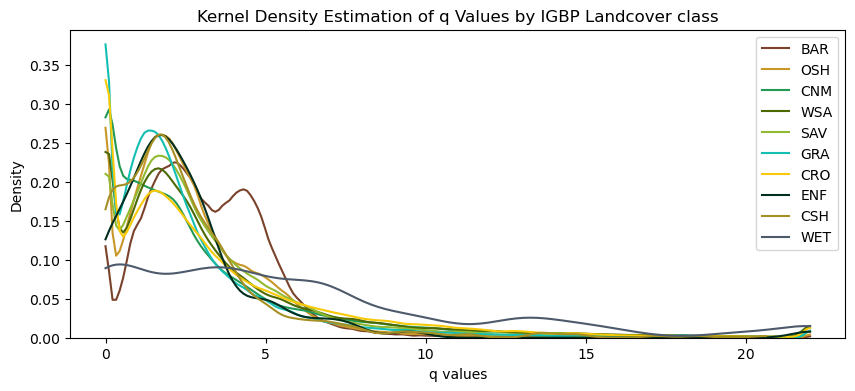

In [33]:
plt.figure(figsize=(10, 4))
for i, category in enumerate(vegetation_categories):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    sns.kdeplot(subset['q_q'], label=category, bw_adjust=0.5, color=colors[i], cut=0)
# Set titles and labels
plt.title('Kernel Density Estimation of q Values by IGBP Landcover class')
plt.xlabel('q values')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Reconstruction of loss function

In [34]:
from functions import q_drydown, exponential_drydown, loss_model

### Each vegetation

/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered 

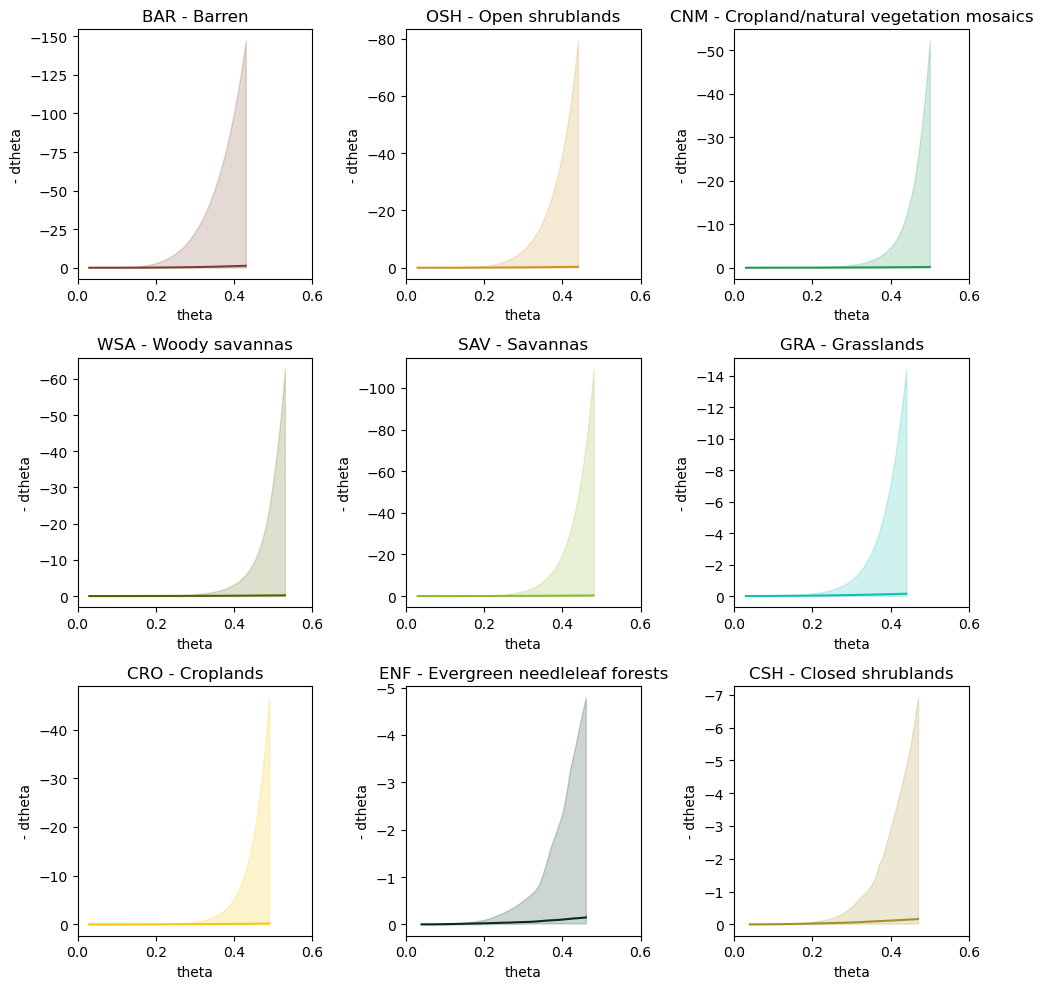

In [35]:
theta = np.arange(0, 1, 0.01)
results = {}
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_categories):
    if i >= 9:  # We only have 7 categories
        break
    ax = axes[i]  # Select the corresponding subplot axis
    category_dtheta = []
    category_data = filtered_df[filtered_df['abbreviation'] == category]
    
    # Calculate the 10% and 90% of max_sm and min_sm for the theta range
    theta_min = category_data['min_sm'].quantile(0.10)
    theta_max = category_data['max_sm'].quantile(0.90)
    
    for _, row in category_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        min_sm = row['min_sm']
        max_sm = row['max_sm']
        
        denormalized_k = k * (max_sm-min_sm)
        
        if (theta_max-theta_min)!=0:
            dtheta = loss_model(theta, q, denormalized_k, theta_wp=theta_min, theta_star=theta_max)
            category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    _dtheta_df = pd.DataFrame(category_dtheta, columns=theta)
    theta_range = theta[(theta >= theta_min) & (theta <= theta_max)]
    dtheta_df = _dtheta_df[theta_range]

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()
    perc_10_losses = dtheta_df.quantile(0.10)
    perc_90_losses = dtheta_df.quantile(0.90)
    

    # Store results for later use
    results[category] = {
        'median': median_losses,
        'perc_10': perc_10_losses,
        'perc_90': perc_90_losses
    }
    

    # Plot median line
    ax.plot(theta_range, median_losses, label=f'{category} Median', color=colors[i])

    # Fill between the 10th and 90th percentile lines
    ax.fill_between(theta_range, perc_10_losses, perc_90_losses, alpha=0.2, color=colors[i])
    ax.invert_yaxis()
    ax.set_xlabel('theta')
    ax.set_ylabel('- dtheta')
    ax.set_xlim([0, 0.6])
    
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.set_title(f'{category} - {full_name}')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()

# Show the plot
plt.show()

### Loss function (y axis normalized)

/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered 

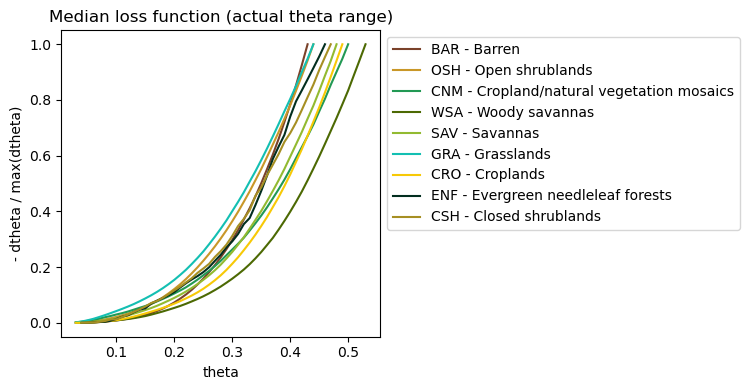

In [36]:
theta = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(figsize=(4, 4))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_categories):
    if i >= 9:  # We only have 7 categories
        break
    category_dtheta = []
    category_data = filtered_df[filtered_df['abbreviation'] == category]
    
    # Calculate the 10% and 90% of max_sm and min_sm for the theta range
    theta_min = category_data['min_sm'].quantile(0.10)
    theta_max = category_data['max_sm'].quantile(0.90)
    
    for _, row in category_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        min_sm = row['min_sm']
        max_sm = row['max_sm']
        
        denormalized_k = k * (max_sm-min_sm)
        dtheta = loss_model(theta, q, denormalized_k, theta_wp=min_sm, theta_star=max_sm)
        category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    _dtheta_df = pd.DataFrame(category_dtheta, columns=theta)
    theta_range = theta[(theta >= theta_min) & (theta <= theta_max)]
    dtheta_df = _dtheta_df[theta_range]

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()
    
    median_losses_norm = median_losses / median_losses.iloc[-1]
    

    # Plot median line
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.plot(theta_range, median_losses_norm, label=f'{category} - {full_name}', color=colors[i])

# ax.invert_yaxis()
ax.set_xlabel('theta')
ax.set_ylabel('- dtheta / max(dtheta)')
ax.set_title('Median loss function (actual theta range)')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()
# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

### Loss function (original shape)

/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered 

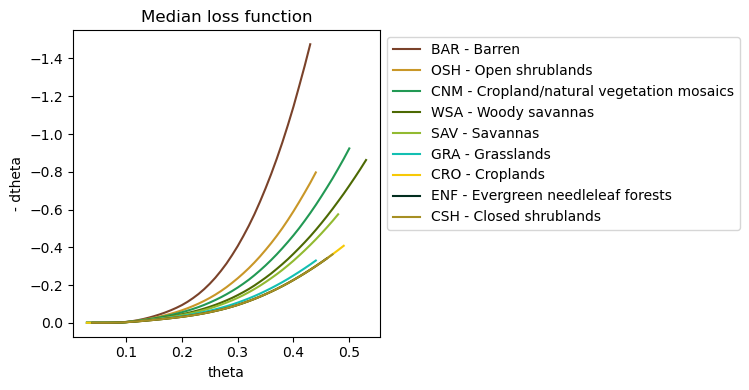

In [37]:
theta = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(figsize=(4, 4))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_categories):
    if i >= 9:  # We only have 7 categories
        break
    category_data = filtered_df[filtered_df['abbreviation'] == category]
    
    # Calculate the 10% and 90% of max_sm and min_sm for the theta range
    theta_min = category_data['min_sm'].quantile(0.10)
    theta_max = category_data['max_sm'].quantile(0.90)
    
    for _, row in category_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        
        denormalized_k = k * (max_sm-min_sm)
        dtheta = loss_model(theta, q, denormalized_k, theta_wp=min_sm, theta_star=max_sm)
        category_dtheta.append(dtheta)
        
        # dtheta = loss_model(theta, q, k, theta_wp=0., theta_star=1.)
        # category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    _dtheta_df = pd.DataFrame(category_dtheta, columns=theta)
    theta_range = theta[(theta >= theta_min) & (theta <= theta_max)]
    dtheta_df = _dtheta_df[theta_range]

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()

    # Plot median line
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.plot(theta_range, median_losses, label=f'{category} - {full_name}', color=colors[i])

ax.invert_yaxis()
ax.set_xlabel('theta')
ax.set_ylabel('- dtheta')
ax.set_title('Median loss function')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()
# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

### Loss function (x and y axis normalized)

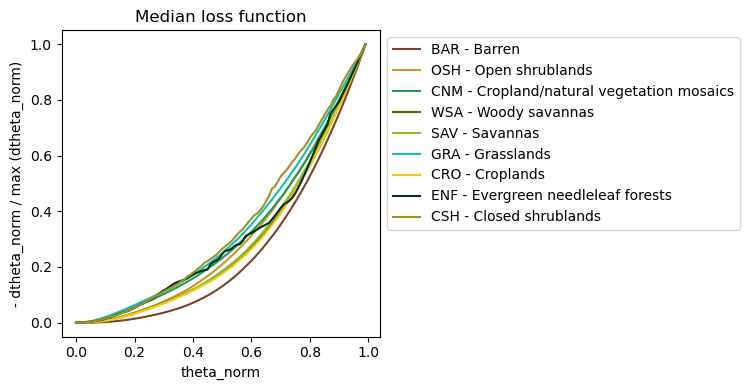

In [38]:
theta = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(figsize=(4, 4))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_categories):
    if i >= 9:  # We only have 7 categories
        break
    category_dtheta = []
    
    for _, row in filtered_df[filtered_df['abbreviation'] == category].iterrows():
        q = row['q_q']
        k = row['q_k']
        dtheta = loss_model(theta, q, k, theta_wp=0., theta_star=1.)
        category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    dtheta_df = pd.DataFrame(category_dtheta, columns=theta)

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()
    
    median_losses_norm = median_losses / median_losses[0.99]
    

    # Plot median line
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.plot(theta, median_losses_norm, label=f'{category} - {full_name}', color=colors[i])

# ax.invert_yaxis()
ax.set_xlabel('theta_norm')
ax.set_ylabel('- dtheta_norm / max (dtheta_norm)')
ax.set_title('Median loss function')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()
# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()

### Loss function (x axis normalized)

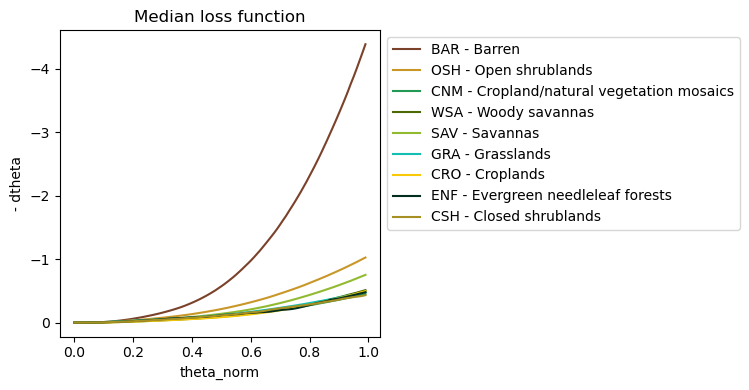

In [39]:


theta = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(figsize=(4, 4))
axes = axes.flatten()
# For each row in the subset, calculate the loss for a range of theta values
for i, category in enumerate(vegetation_categories):
    if i >= 9:  # We only have 7 categories
        break
    category_dtheta = []
    
    for _, row in filtered_df[filtered_df['abbreviation'] == category].iterrows():
        q = row['q_q']
        k = row['q_k']
        dtheta = loss_model(theta, q, k, theta_wp=0., theta_star=1.)
        category_dtheta.append(dtheta)

    # Convert to a DataFrame for easier percentile and median calculations
    dtheta_df = pd.DataFrame(category_dtheta, columns=theta)

    # Calculate median and percentiles for each theta
    median_losses = dtheta_df.median()

    # Plot median line
    full_name = IGBPclass.loc[IGBPclass["abbreviation"]==category, "name"].values[0]
    ax.plot(theta, median_losses, label=f'{category} - {full_name}', color=colors[i])

ax.invert_yaxis()
ax.set_xlabel('theta_norm')
ax.set_ylabel('- dtheta')
ax.set_title('Median loss function')

# Adjust the layout so the subplots fit into the figure area
plt.tight_layout()
# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()



## Time variation of q

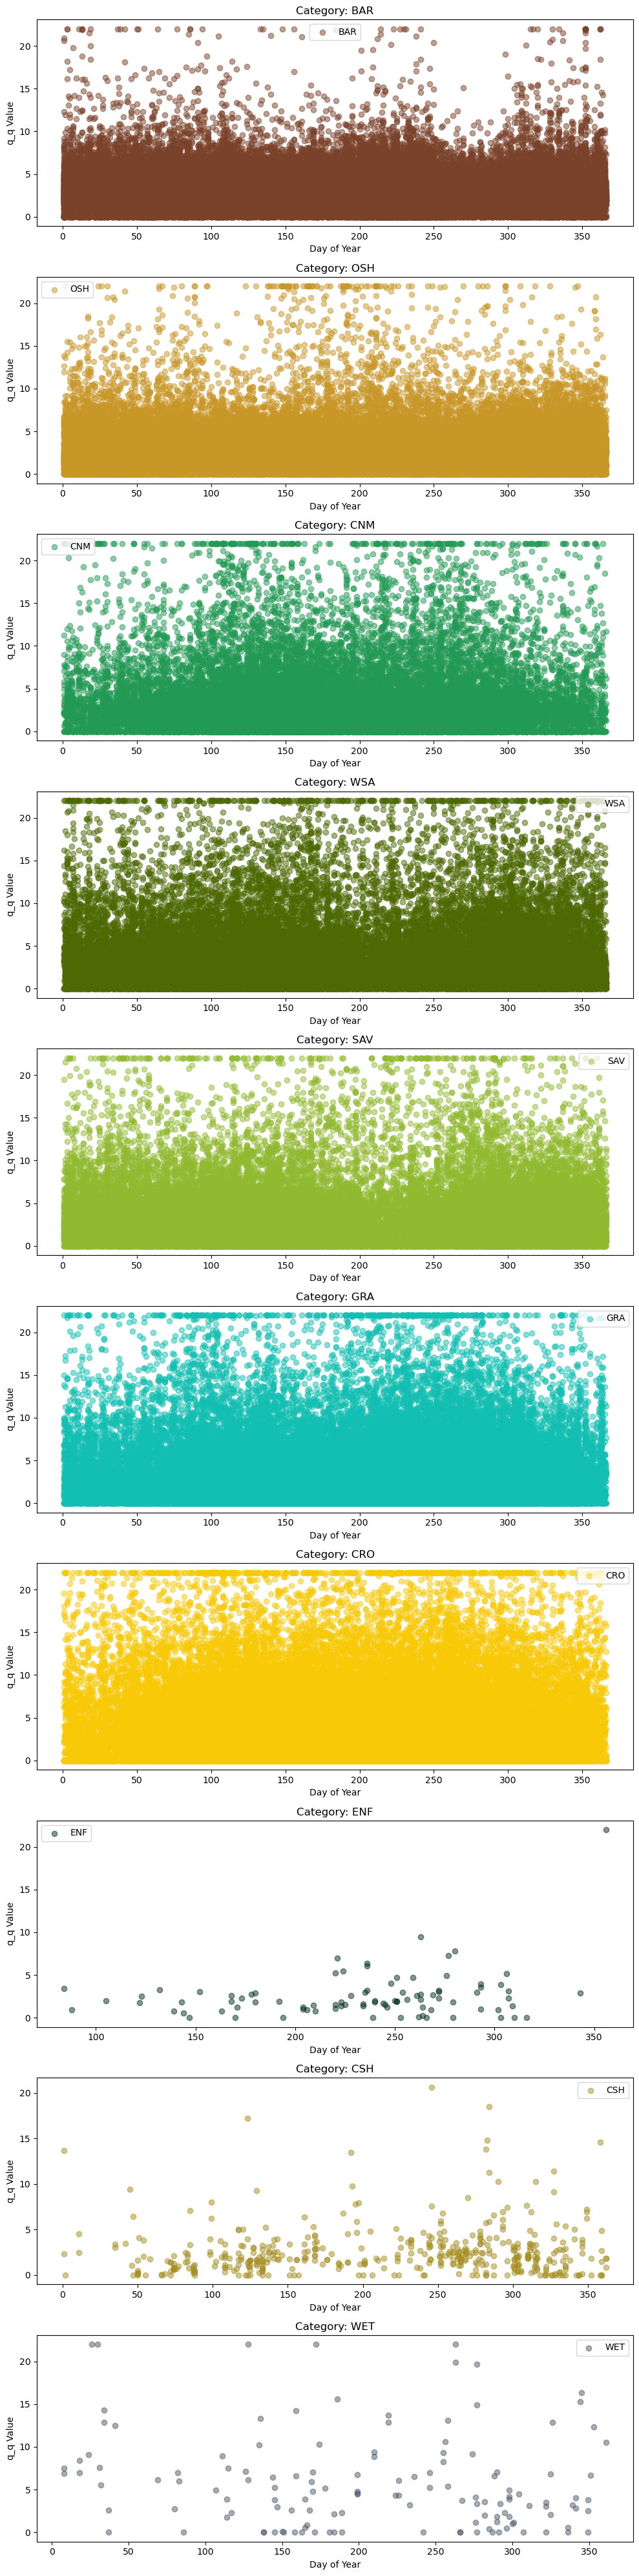

In [40]:
import matplotlib.pyplot as plt

# Extract the day of the year
filtered_df["doy"] = pd.to_datetime(filtered_df['event_start']).dt.dayofyear
num_categories = len(vegetation_categories)
fig, axes = plt.subplots(num_categories, 1, figsize=(10, 4 * num_categories))

for i, category in enumerate(vegetation_categories):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    ax = axes[i] if num_categories > 1 else axes
    ax.scatter(subset['doy'].values, subset['q_q'].values, label=category, color=colors[i], alpha=0.5)
    ax.legend()
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('q_q Value')
    ax.set_title(f'Category: {category}')

plt.tight_layout()
plt.show()


## Time variation of q (all together)

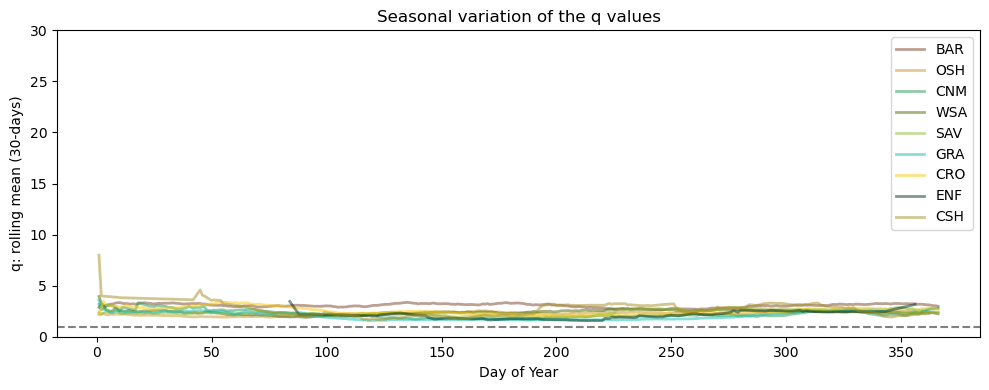

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming filtered_df, vegetation_order, and colors are defined

# Extract the day of the year
num_categories = len(vegetation_categories[:-1])
fig, ax = plt.subplots(1, figsize=(10, 4))

for i, category in enumerate(vegetation_categories[:-1]):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    
    # Group by day of the year and calculate the median of 'q_q'
    subset = subset.reset_index()
    median_values = subset.groupby('doy')['q_q'].median().rolling(window=30, min_periods=1).mean()

    # Plot the median values
    ax.plot(median_values.index, median_values.values, label=f'{category}', color=colors[i], linewidth=2, alpha=0.5)

ax.legend()
ax.set_ylim([0,30])
ax.set_xlabel('Day of Year')
ax.set_ylabel('q: rolling mean (30-days)')
ax.set_title(f'Seasonal variation of the q values')
plt.axhline(y=1, color='grey', linestyle='--')
plt.tight_layout()
plt.show()


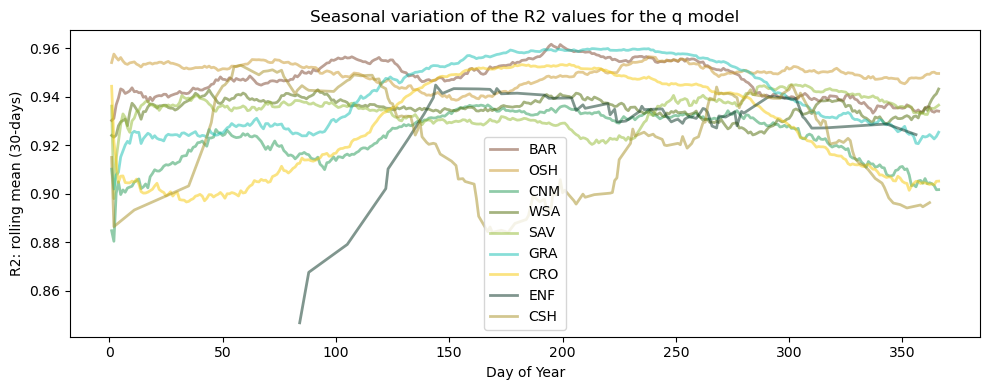

In [42]:

import pandas as pd

# Assuming filtered_df, vegetation_order, and colors are defined

# Extract the day of the year
num_categories = len(vegetation_categories[:-1])
fig, ax = plt.subplots(1, figsize=(10, 4))

for i, category in enumerate(vegetation_categories[:-1]):
    subset = filtered_df[filtered_df['abbreviation'] == category]
    
    # Group by day of the year and calculate the median of 'q_q'
    subset = subset.reset_index()
    median_values = subset.groupby('doy')['q_r_squared'].median().rolling(window=30, min_periods=1).mean()

    # Plot the median values
    ax.plot(median_values.index, median_values.values, label=f'{category}', color=colors[i], linewidth=2, alpha=0.5)

    ax.legend()
    ax.set_xlabel('Day of Year')
    ax.set_ylabel('R2: rolling mean (30-days)')
    ax.set_title(f'Seasonal variation of the R2 values for the q model')

plt.tight_layout()
plt.show()


# Soil deep dive

## R2 plot

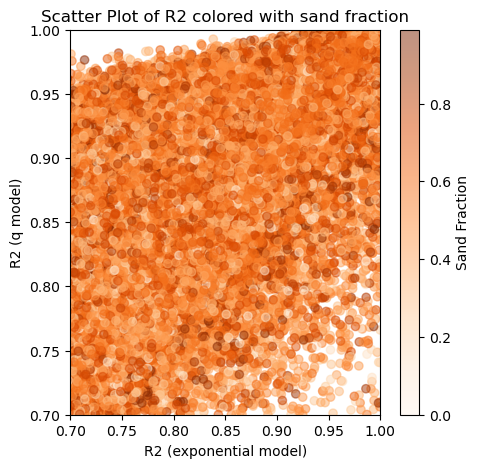

In [43]:
# Assuming 'df' is your DataFrame, 'vegetation_class' is your categorical column and 'value' is the numerical column.

# Set the figure size for better visibility
plt.figure(figsize=(5, 5))

scatter = plt.scatter(filtered_df.exp_r_squared, filtered_df.q_r_squared, c=filtered_df.sand_fraction, cmap='Oranges', alpha=.5)

# Add labels and title
plt.colorbar(scatter, label='Sand Fraction')
plt.xlabel('R2 (exponential model)')
plt.ylabel('R2 (q model)')
plt.title('Scatter Plot of R2 colored with sand fraction')
plt.xlim([0.7, 1.0])
plt.ylim([0.7, 1.0])

# Show the plot
plt.show()

In [44]:
filtered_df['sand_bin'] == bin

KeyError: 'sand_bin'

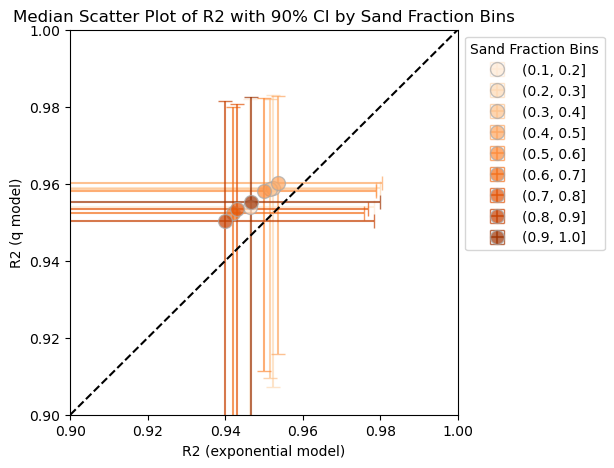

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'sand_fraction' is your continuous variable.

# Set the figure size for better visibility
plt.figure(figsize=(5, 5))

# Bin the 'sand_fraction' into intervals
bins = np.arange(0, 1.1, 0.1)  # Adjust the range and step as needed
df['sand_bin'] = pd.cut(df['sand_fraction'], bins)

# Get unique bins and sort them
sand_bins = df['sand_bin'].unique()
sand_bins = sorted(sand_bins, key=lambda x: x.left)  # Sort bins by their left edge

# Initialize a dictionary to store the medians and CIs
stats_dict = {}

# Calculate median and 90% confidence intervals for each sand bin
for i, bin in enumerate(sand_bins):
    subset = filtered_df[filtered_df['sand_bin'] == bin]

    # Check if the subset is empty
    if subset.empty:
        continue

    # Median calculation
    exp_median = subset['exp_r_squared'].median()
    q_median = subset['q_r_squared'].median()
    
    # 90% CI calculation, using the 25th and 75th percentiles
    exp_ci_low, exp_ci_high = np.percentile(subset['exp_r_squared'].dropna(), [25, 75])
    q_ci_low, q_ci_high = np.percentile(subset['q_r_squared'].dropna(), [25, 75])
    
    # Store in dict
    stats_dict[bin] = {
        'exp_median': exp_median,
        'q_median': q_median,
        'exp_ci': (exp_median - exp_ci_low, exp_ci_high - exp_median),
        'q_ci': (q_median - q_ci_low, q_ci_high - q_median),
        'color': plt.cm.Oranges(i / len(sand_bins))  # Color mapping
    }

# Now plot medians with CIs
for bin, stats in stats_dict.items():
    plt.errorbar(stats['exp_median'], stats['q_median'],
                 xerr=np.array([[stats['exp_ci'][0]], [stats['exp_ci'][1]]]),
                 yerr=np.array([[stats['q_ci'][0]], [stats['q_ci'][1]]]),
                 fmt='o', label=str(bin), capsize=5, capthick=2, color=stats['color'], alpha=0.7, markersize=10, mec='darkgray', mew=1)

# Add labels, title, and legend
plt.xlabel('R2 (exponential model)')
plt.ylabel('R2 (q model)')
plt.xlim([0.9, 1.0])
plt.ylim([0.9, 1.0])
plt.title('Median Scatter Plot of R2 with 90% CI by Sand Fraction Bins')
plt.legend(title='Sand Fraction Bins', bbox_to_anchor=(1, 1))

# Add a trendline
plt.plot([0.9, 1], [0.9, 1], color='k', linestyle='--', label='1:1 line')

# Show the plot
plt.show()


## Density plot

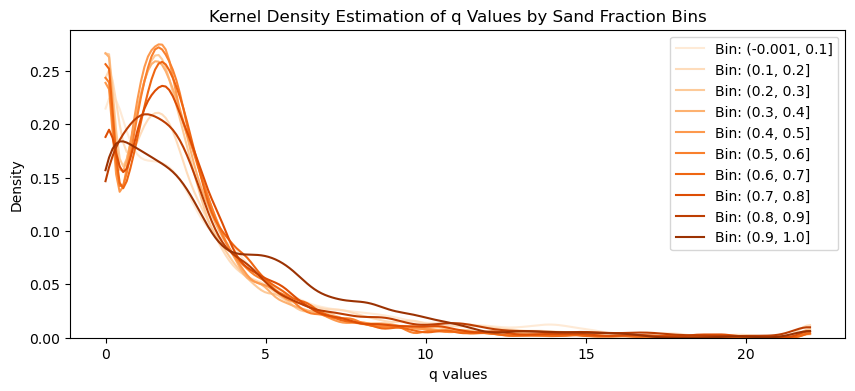

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'filtered_df' is your DataFrame and 'sand_fraction' is your continuous variable.

# Bin the 'sand_fraction' into intervals
bins = np.arange(0, 1.1, 0.1)  # Adjust the range and step as needed
filtered_df['sand_bin'] = pd.cut(filtered_df['sand_fraction'], bins, include_lowest=True)

# Set the figure size
plt.figure(figsize=(10, 4))

# Get unique bins
sand_bins = filtered_df['sand_bin'].unique()
sand_bins = sorted(sand_bins, key=lambda x: x.left)
# Define a color palette
palette = sns.color_palette("Oranges", len(sand_bins))

# Plotting KDE for each bin
for i, bin in enumerate(sand_bins):
    subset = filtered_df[filtered_df['sand_bin'] == bin]
    sns.kdeplot(subset['q_q'], label=f'Bin: {bin}', bw_adjust=0.5, color=palette[i], cut=0)

# Set titles and labels
plt.title('Kernel Density Estimation of q Values by Sand Fraction Bins')
plt.xlabel('q values')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()


## Loss function (actual ranges)

/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered 

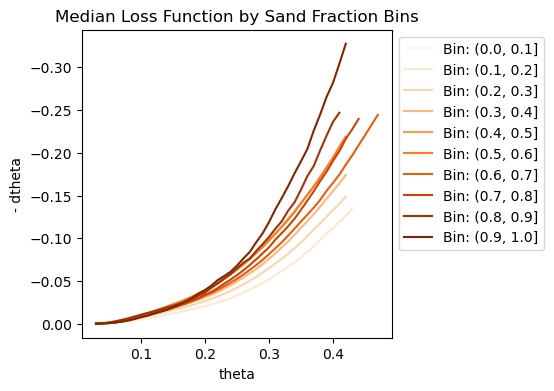

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is your DataFrame and 'sand_fraction' is your continuous variable.

# Bin the 'sand_fraction' into intervals
bins = np.arange(0, 1.1, 0.1)  # Adjust the range and step as needed
filtered_df['sand_bin'] = pd.cut(filtered_df['sand_fraction'], bins, include_lowest=True)

# Set the figure size
fig, ax = plt.subplots(figsize=(4, 4))

# Get unique bins

# Define a color palette
palette = plt.cm.Oranges(np.linspace(0, 1, len(sand_bins)))

theta = np.arange(0, 1, 0.01)

# Plotting for each sand bin
for i, bin in enumerate(sand_bins):
    bin_data = filtered_df[filtered_df['sand_bin'] == bin]
    
    category_dtheta = []

    # Calculate the 10% and 90% of max_sm and min_sm for the theta range
    theta_min = bin_data['min_sm'].quantile(0.10)
    theta_max = bin_data['max_sm'].quantile(0.90)
    
    for _, row in bin_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        
        # Assuming 'loss_model' is defined and uses 'theta', 'q', 'k', and other parameters
        denormalized_k = k * (theta_max - theta_min)
        dtheta = loss_model(theta, q, denormalized_k, theta_wp=theta_min, theta_star=theta_max)
        category_dtheta.append(dtheta)
    
    # Convert to a DataFrame
    _dtheta_df = pd.DataFrame(category_dtheta, columns=theta)
    theta_range = theta[(theta >= theta_min) & (theta <= theta_max)]
    dtheta_df = _dtheta_df[theta_range]

    # Calculate median for each theta
    median_losses = dtheta_df.median()

    # Plot median line
    ax.plot(theta_range, median_losses, label=f'Bin: {bin}', color=palette[i])

# Customize plot
ax.invert_yaxis()
ax.set_xlabel('theta')
ax.set_ylabel('- dtheta')
ax.set_title('Median Loss Function by Sand Fraction Bins')

# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


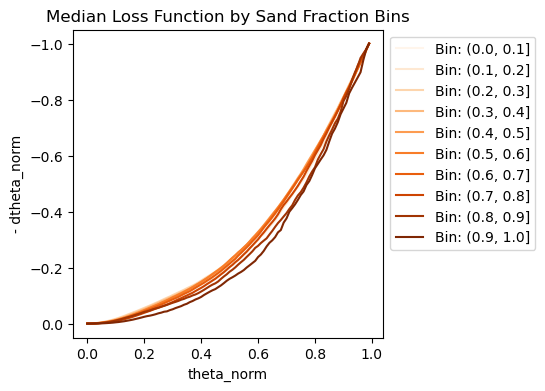

In [ ]:
# Plotting for each sand bin
# Set the figure size
fig, ax = plt.subplots(figsize=(4, 4))

for i, bin in enumerate(sand_bins):
    bin_data = filtered_df[filtered_df['sand_bin'] == bin]
    
    category_dtheta = []
    
    for _, row in bin_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        dtheta = loss_model(theta, q, k, theta_wp=0, theta_star=1)
        category_dtheta.append(dtheta)
    
    # Convert to a DataFrame
    dtheta_df = pd.DataFrame(category_dtheta, columns=theta)

    # Calculate median for each theta
    median_losses = dtheta_df.median()
    median_losses_norm = median_losses / median_losses[0.99] * -1

    # Plot median line
    ax.plot(theta, median_losses_norm, label=f'Bin: {bin}', color=palette[i])

# Customize plot
ax.invert_yaxis()
ax.set_xlabel('theta_norm')
ax.set_ylabel('- dtheta_norm')
ax.set_title('Median Loss Function by Sand Fraction Bins')

# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


## Aridity index deep dive

### R2 plot

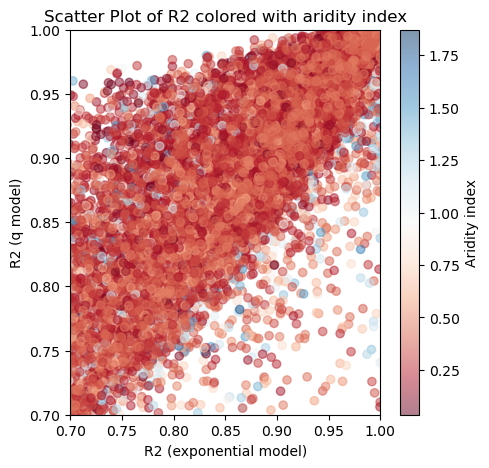

In [ ]:
# Assuming 'df' is your DataFrame, 'vegetation_class' is your categorical column and 'value' is the numerical column.

# Set the figure size for better visibility
plt.figure(figsize=(5, 5))

scatter = plt.scatter(filtered_df.exp_r_squared, filtered_df.q_r_squared, c=filtered_df.AI, cmap='RdBu', alpha=.5)

# Add labels and title
plt.colorbar(scatter, label='Aridity index')
plt.xlabel('R2 (exponential model)')
plt.ylabel('R2 (q model)')
plt.title('Scatter Plot of R2 colored with aridity index')
plt.xlim([0.7, 1.0])
plt.ylim([0.7, 1.0])

# Show the plot
plt.show()

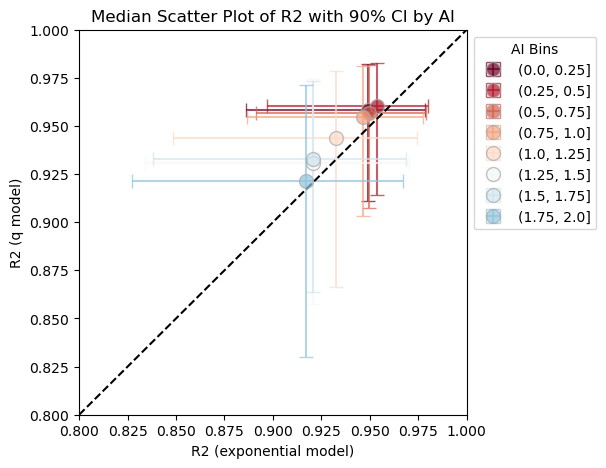

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'sand_fraction' is your continuous variable.

# Set the figure size for better visibility
plt.figure(figsize=(5, 5))
ai_bins = [i * 0.25 for i in range(9)]

# Bin the 'sand_fraction' into intervals
filtered_df['ai_bin'] = pd.cut(filtered_df['AI'], ai_bins)

# Get unique bins and sort them
ai_bin = df['ai_bin'].unique()
ai_bin = sorted(ai_bin, key=lambda x: x.left)  # Sort bins by their left edge

# Initialize a dictionary to store the medians and CIs
stats_dict = {}

# Calculate median and 90% confidence intervals for each sand bin
for i, bin in enumerate(ai_bin):
    subset = filtered_df[filtered_df['ai_bin'] == bin]

    # Check if the subset is empty
    if subset.empty:
        continue

    # Median calculation
    exp_median = subset['exp_r_squared'].median()
    q_median = subset['q_r_squared'].median()
    
    # 90% CI calculation, using the 25th and 75th percentiles
    exp_ci_low, exp_ci_high = np.percentile(subset['exp_r_squared'].dropna(), [25, 75])
    q_ci_low, q_ci_high = np.percentile(subset['q_r_squared'].dropna(), [25, 75])
    
    # Store in dict
    stats_dict[bin] = {
        'exp_median': exp_median,
        'q_median': q_median,
        'exp_ci': (exp_median - exp_ci_low, exp_ci_high - exp_median),
        'q_ci': (q_median - q_ci_low, q_ci_high - q_median),
        'color': plt.cm.RdBu(i / len(sand_bins))  # Color mapping
    }

# Now plot medians with CIs
for bin, stats in stats_dict.items():
    plt.errorbar(stats['exp_median'], stats['q_median'],
                 xerr=np.array([[stats['exp_ci'][0]], [stats['exp_ci'][1]]]),
                 yerr=np.array([[stats['q_ci'][0]], [stats['q_ci'][1]]]),
                 fmt='o', label=str(bin), capsize=5, capthick=2, color=stats['color'], alpha=0.7, markersize=10, mec='darkgray', mew=1)

# Add labels, title, and legend
plt.xlabel('R2 (exponential model)')
plt.ylabel('R2 (q model)')
plt.xlim([0.8, 1.0])
plt.ylim([0.8, 1.0])
plt.title('Median Scatter Plot of R2 with 90% CI by AI')
plt.legend(title='AI Bins', bbox_to_anchor=(1, 1))

# Add a trendline
plt.plot([0.8, 1], [0.8, 1], color='k', linestyle='--', label='1:1 line')

# Show the plot
plt.show()


### Distribution

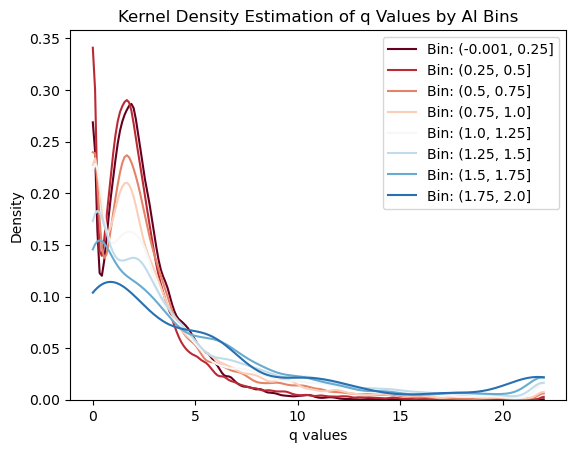

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a color palette
palette = plt.cm.RdBu(np.linspace(0, 1, len(ai_bins)))

# Assuming 'filtered_df' is your DataFrame and 'sand_fraction' is your continuous variable.
# Bin the 'sand_fraction' into intervals
ai_bins = [i * 0.25 for i in range(9)]
filtered_df['ai_bin'] = pd.cut(filtered_df['AI'], ai_bins, include_lowest=True)
# Get unique bins and sort them
ai_bin = filtered_df['ai_bin'].unique()
ai_bin = sorted(ai_bin, key=lambda x: x.left)  # Sort bins by their left edge
# Bin the 'sand_fraction' into intervals
# Plotting KDE for each bin
for i, bin in enumerate(ai_bin):
    subset = filtered_df[filtered_df['ai_bin'] == bin]
    sns.kdeplot(subset['q_q'], label=f'Bin: {bin}', bw_adjust=0.5, color=palette[i], cut=0)

# Set titles and labels
plt.title('Kernel Density Estimation of q Values by AI Bins')
plt.xlabel('q values')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.show()


/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered 

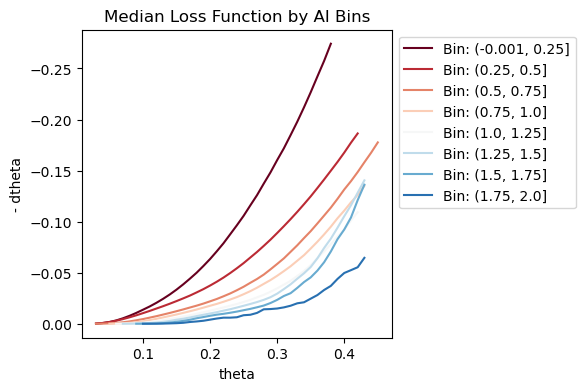

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is your DataFrame and 'sand_fraction' is your continuous variable.

# Bin the 'sand_fraction' into intervals
ai_bins = [i * 0.25 for i in range(9)]
filtered_df['ai_bin'] = pd.cut(filtered_df['AI'], ai_bins, include_lowest=True)
# Get unique bins and sort them
ai_bin = filtered_df['ai_bin'].unique()
ai_bin = sorted(ai_bin, key=lambda x: x.left)  # Sort bins by their left edge


# Set the figure size
fig, ax = plt.subplots(figsize=(4, 4))

# Get unique bins

theta = np.arange(0, 1, 0.01)

# Plotting for each sand bin
for i, bin in enumerate(ai_bin):
    bin_data = filtered_df[filtered_df['ai_bin'] == bin]
    
    category_dtheta = []

    # Calculate the 10% and 90% of max_sm and min_sm for the theta range
    theta_min = bin_data['min_sm'].quantile(0.10)
    theta_max = bin_data['max_sm'].quantile(0.90)
    
    for _, row in bin_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        
        # Assuming 'loss_model' is defined and uses 'theta', 'q', 'k', and other parameters
        denormalized_k = k * (theta_max - theta_min)
        dtheta = loss_model(theta, q, denormalized_k, theta_wp=theta_min, theta_star=theta_max)
        category_dtheta.append(dtheta)
    
    # Convert to a DataFrame
    _dtheta_df = pd.DataFrame(category_dtheta, columns=theta)
    theta_range = theta[(theta >= theta_min) & (theta <= theta_max)]
    dtheta_df = _dtheta_df[theta_range]

    # Calculate median for each theta
    median_losses = dtheta_df.median()

    # Plot median line
    ax.plot(theta_range, median_losses, label=f'Bin: {bin}', color=palette[i])

# Customize plot
ax.invert_yaxis()
ax.set_xlabel('theta')
ax.set_ylabel('- dtheta')
ax.set_title('Median Loss Function by AI Bins')

# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered in power
  d_theta = -k * ( ( theta - theta_wp ) / ( theta_star - theta_wp ) ) ** (q)
/home/raraki/smap-drydown/notebooks/functions.py:13: RuntimeWarning: invalid value encountered 

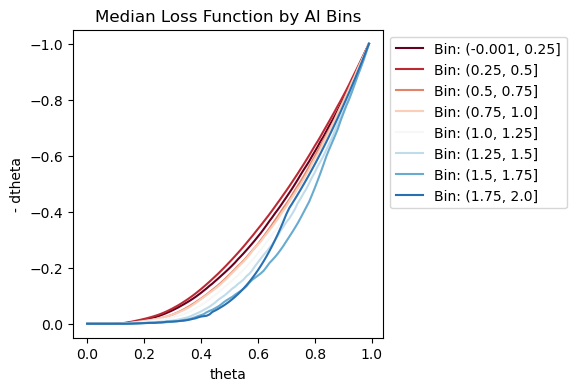

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is your DataFrame and 'sand_fraction' is your continuous variable.

# Bin the 'sand_fraction' into intervals
ai_bins = [i * 0.25 for i in range(9)]
filtered_df['ai_bin'] = pd.cut(filtered_df['AI'], ai_bins, include_lowest=True)
# Get unique bins and sort them
ai_bin = filtered_df['ai_bin'].unique()
ai_bin = sorted(ai_bin, key=lambda x: x.left)  # Sort bins by their left edge


# Set the figure size
fig, ax = plt.subplots(figsize=(4, 4))

# Get unique bins



theta = np.arange(0, 1, 0.01)

# Plotting for each sand bin
for i, bin in enumerate(ai_bin):
    bin_data = filtered_df[filtered_df['ai_bin'] == bin]
    
    category_dtheta = []

    for _, row in bin_data.iterrows():
        q = row['q_q']
        k = row['q_k']
        
        # Assuming 'loss_model' is defined and uses 'theta', 'q', 'k', and other parameters
        dtheta = loss_model(theta, q, k, theta_wp=theta_min, theta_star=theta_max)
        category_dtheta.append(dtheta)
    
    # Convert to a DataFrame
    dtheta_df = pd.DataFrame(category_dtheta, columns=theta)

    # Calculate median for each theta
    median_losses = dtheta_df.median()
    median_losses_norm = median_losses / median_losses[0.99] * -1

    # Plot median line
    ax.plot(theta, median_losses_norm, label=f'Bin: {bin}', color=palette[i])

# Customize plot
ax.invert_yaxis()
ax.set_xlabel('theta')
ax.set_ylabel('- dtheta')
ax.set_title('Median Loss Function by AI Bins')

# Add a legend
plt.legend(bbox_to_anchor=(1, 1))
# Show the plot
plt.show()


# Filter by range of SM

In [54]:
def calculate_sm_range(row):
    input_string = row.sm

    # Processing the string
    input_string = input_string.replace('\n', ' np.nan')
    input_string = input_string.replace(' nan', ' np.nan')
    input_string = input_string.strip('[]')

    # Converting to numpy array and handling np.nan
    sm = np.array([float(value) if value != 'np.nan' else np.nan for value in input_string.split()])

    # Calculating sm_range
    sm_range = (np.nanmax(sm) - np.nanmin(sm)) / (row.max_sm - row.min_sm) if row.max_sm != row.min_sm else np.nan
    return sm_range

# Applying the function to each row and creating a new column 'sm_range'
filtered_df['sm_range'] = filtered_df.apply(calculate_sm_range, axis=1)

In [129]:
def calculate_sm_avg(row):
    input_string = row.sm

    # Processing the string
    input_string = input_string.replace('\n', ' np.nan')
    input_string = input_string.replace(' nan', ' np.nan')
    input_string = input_string.strip('[]')

    # Converting to numpy array and handling np.nan
    sm = np.array([float(value) if value != 'np.nan' else np.nan for value in input_string.split()])

    # Calculating sm_range
    avg_sm = (np.nanmax(sm) + np.nanmin(sm))/2
    return avg_sm

# Applying the function to each row and creating a new column 'sm_range'
filtered_df['avg_sm'] = filtered_df.apply(calculate_sm_avg, axis=1)

Text(0.5, 0, 'SM range covered within an event')

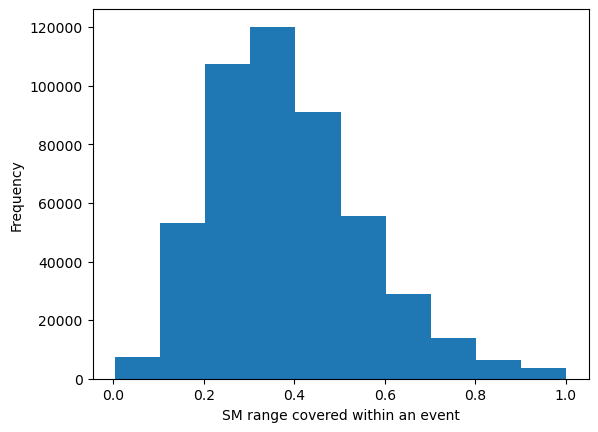

In [56]:
ax = filtered_df['sm_range'].plot.hist()
ax.set_xlabel('SM range covered within an event')

# Parameter comparison

In [130]:
filtered_df3 = filtered_df[filtered_df['sm_range']>0.2].copy()

<Axes: ylabel='Frequency'>

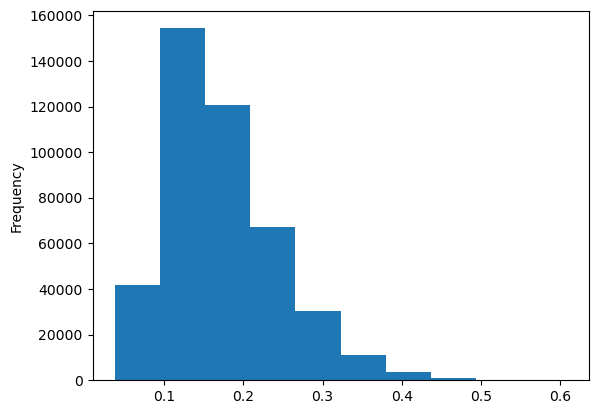

In [131]:
filtered_df3['avg_sm'].plot.hist()

In [107]:
filtered_df3.columns

Index(['Unnamed: 0', 'EASE_row_index', 'EASE_column_index', 'event_start',
       'event_end', 'time', 'sm', 'min_sm', 'max_sm', 'pet', 'exp_delta_theta',
       'exp_theta_w', 'exp_tau', 'exp_r_squared', 'exp_y_opt', 'q_k', 'q_q',
       'q_delta_theta', 'q_r_squared', 'q_y_opt', 'id_x', 'latitude',
       'longitude', 'sand_fraction', 'IGBP_landcover', 'id_y', 'AI', 'class',
       'name', 'description', 'abbreviation', '_diff_R2', 'q_k_dernormalize',
       'q_AET/PET', 'sand_bins', 'ai_bins', 'doy', 'sm_range'],
      dtype='object')

<Axes: ylabel='Frequency'>

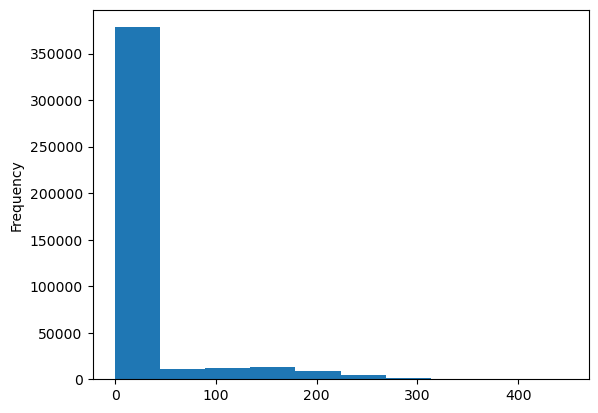

In [108]:
filtered_df3['q_k_dernormalize'].plot.hist()

<Axes: ylabel='Frequency'>

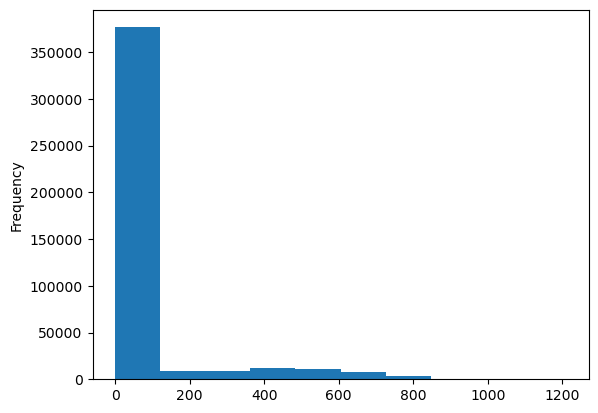

In [109]:
filtered_df3['q_k'].plot.hist()

In [ ]:
def plot_scatter_with_errorbar(target_df, quantile, category, color, x_varname, x_label, y_varname, y_label, x_max, y_max):
    plt.figure(figsize=(5, 5))
    stats_dict = {}

    # Calculate median and 90% confidence intervals for each vegetation class
    for i, category in enumerate(categories):
        
        subset = target_df[target_df['abbreviation'] == category]
        
        # Median calculation
        x_median = subset[x_varname].median()
        y_median = subset[y_varname].median()
        
        # 90% CI calculation, using the 5th and 95th percentiles
        x_ci_low, x_ci_high = np.percentile(subset[x_varname], [quantile, 100-quantile])
        y_ci_low, y_ci_high = np.percentile(subset[y_varname], [quantile, 100-quantile])
        
        # Store in dict
        stats_dict[category] = {
            'x_median': x_median,
            'y_median': y_median,
            'x_ci': (x_median - x_ci_low, x_ci_high - x_median),
            'y_ci': (y_median - y_ci_low, y_ci_high - y_median),
            'color': colors[i]
        }

    # Now plot medians with CIs
    for category, stats in stats_dict.items():
        plt.errorbar(stats['x_median'], stats['y_median'],
                    xerr=np.array([[stats['x_ci'][0]], [stats['x_ci'][1]]]),
                    yerr=np.array([[stats['y_ci'][0]], [stats['y_ci'][1]]]),
                    fmt='o', label=category, capsize=5, capthick=2, color=stats['color'], alpha=0.7,markersize=10 , mec='darkgray', mew=1)

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Median Scatter Plot of R2 with {quantile}% CI')

    # Add a legend
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xscale('log')
    plt.xlim(0.0, x_max)
    plt.ylim(0.0, y_max)

    # Show the plot
    plt.show()

/tmp/ipykernel_2359117/2811452588.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0.0, x_max)


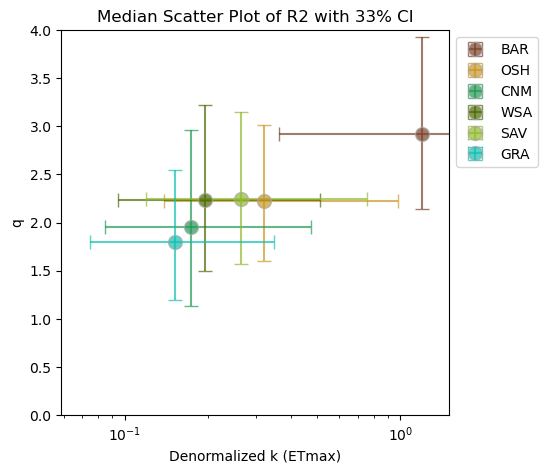

In [ ]:
# Define the specific order for your categories.
vegetation_categories = ["BAR", "OSH", "CNM", "WSA", "SAV", "GRA", "CRO"]
colors = ["#7A422A", "#C99728", "#229954", "#4C6903", "#92BA31", "#13BFB2", "#F7C906"]

plot_scatter_with_errorbar(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="q_k_dernormalize", x_label="Denormalized k (ETmax)", y_varname="q_q", y_label="q", x_max=1.5, y_max=4)

/tmp/ipykernel_2359117/2811452588.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0.0, x_max)


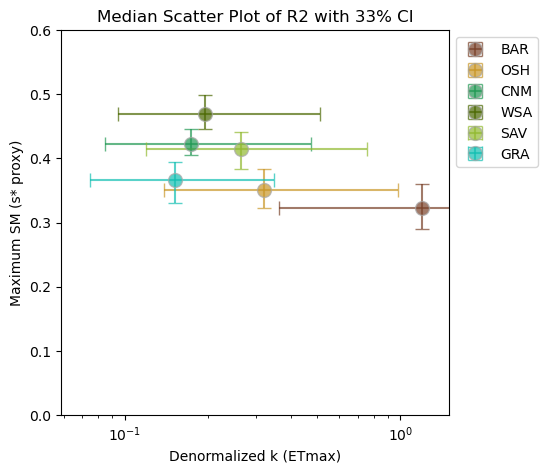

In [112]:
plot_scatter_with_errorbar(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="q_k_dernormalize", x_label="Denormalized k (ETmax)", y_varname="max_sm", y_label="Maximum SM (s* proxy)", x_max=1.5, y_max=0.6)

/tmp/ipykernel_2359117/2811452588.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0.0, x_max)


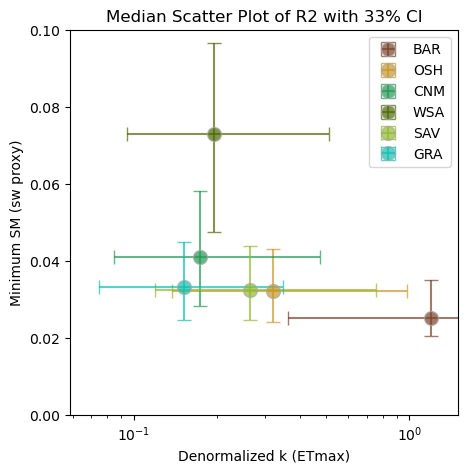

In [113]:
plot_scatter_with_errorbar(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="q_k_dernormalize", x_label="Denormalized k (ETmax)", y_varname="min_sm", y_label="Minimum SM (sw proxy)", x_max=1.5, y_max=0.1)

/tmp/ipykernel_2359117/2811452588.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0.0, x_max)


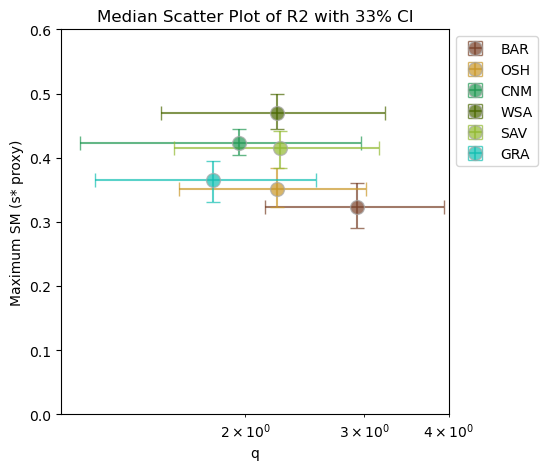

In [114]:
plot_scatter_with_errorbar(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="q_q", x_label="q", y_varname="max_sm", y_label="Maximum SM (s* proxy)", x_max=4.0, y_max=0.6)

# Parameter gradient with PET change

/tmp/ipykernel_2359117/2811452588.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0.0, x_max)


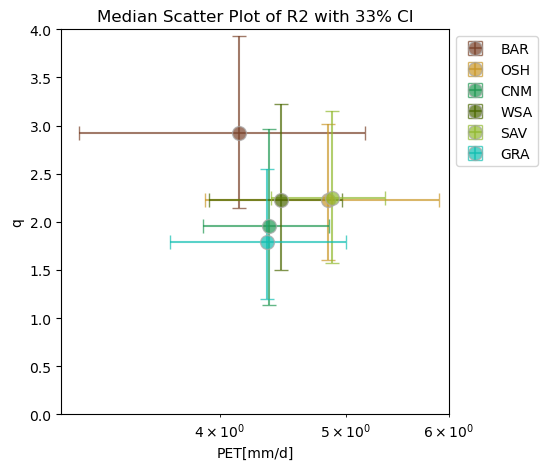

In [124]:
plot_scatter_with_errorbar(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="pet", x_label="PET[mm/d]", y_varname="q_q", y_label="q", x_max=6, y_max=4.0)

/tmp/ipykernel_2359117/2811452588.py:42: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0.0, x_max)


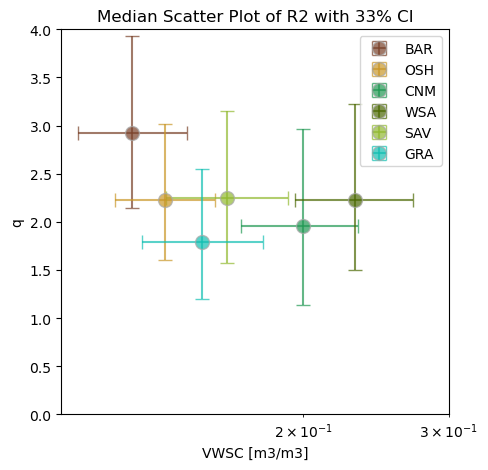

In [132]:
plot_scatter_with_errorbar(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="avg_sm", x_label="VWSC [m3/m3]", y_varname="q_q", y_label="q", x_max=0.3, y_max=4.0)

In [143]:
import seaborn as sns
from scipy.stats import linregress

In [148]:
def plot_trendline(target_df, quantile, category, color, x_varname, x_label, y_varname, y_label, x_max, y_max):
    plt.figure(figsize=(5, 5))
    stats_dict = {}

    # Calculate median and 90% confidence intervals for each vegetation class
    for i, category in enumerate(categories):
        subset = target_df[target_df['abbreviation'] == category]
        
        # Calculate the linear regression (trend line)
        slope, intercept, r_value, p_value, std_err = linregress(subset[x_varname], subset[y_varname])
        
        # Generate x values for the trend line
        x_values = np.linspace(0, x_max, 100)
        
        # Calculate the y values based on the slope and intercept
        y_values = slope * x_values + intercept
        
        # Plot the trend line
        plt.plot(x_values, y_values, label=f"{category} Trend", alpha=0.7, color=color[i])

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add a legend
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlim(0.0, x_max)
    plt.ylim(0.0, y_max)

    # Show the plot
    plt.show()

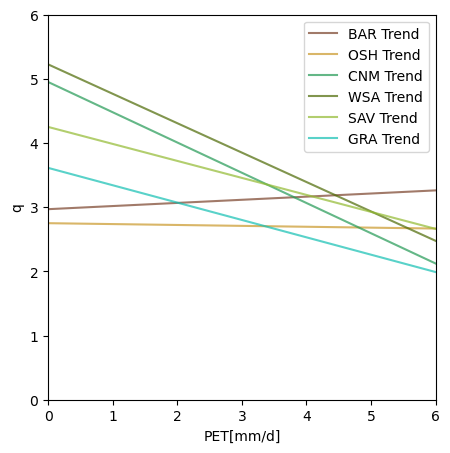

In [150]:
plot_trendline(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="pet", x_label="PET[mm/d]", y_varname="q_q", y_label="q", x_max=6, y_max=6)

In [ ]:
plot_trendline(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="pet", x_label="avg_sm", y_varname="average soil moisture", y_label="q", x_max=0.6, y_max=6)

In [151]:

def plot_scatter(target_df, quantile, category, color, x_varname, x_label, y_varname, y_label, x_max, y_max):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten() 
    stats_dict = {}

    # Calculate median and 90% confidence intervals for each vegetation class
    for i, category in enumerate(categories):
        subset = target_df[target_df['abbreviation'] == category]
        ax = axs[i]
        # Plot the trend line
        ax.scatter(subset[x_varname],  subset[y_varname], label=f"{category} Trend", alpha=0.7, color=color[i])

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add a legend
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xlim(0.0, x_max)
    plt.ylim(0.0, y_max)

    # Show the plot
    plt.show()

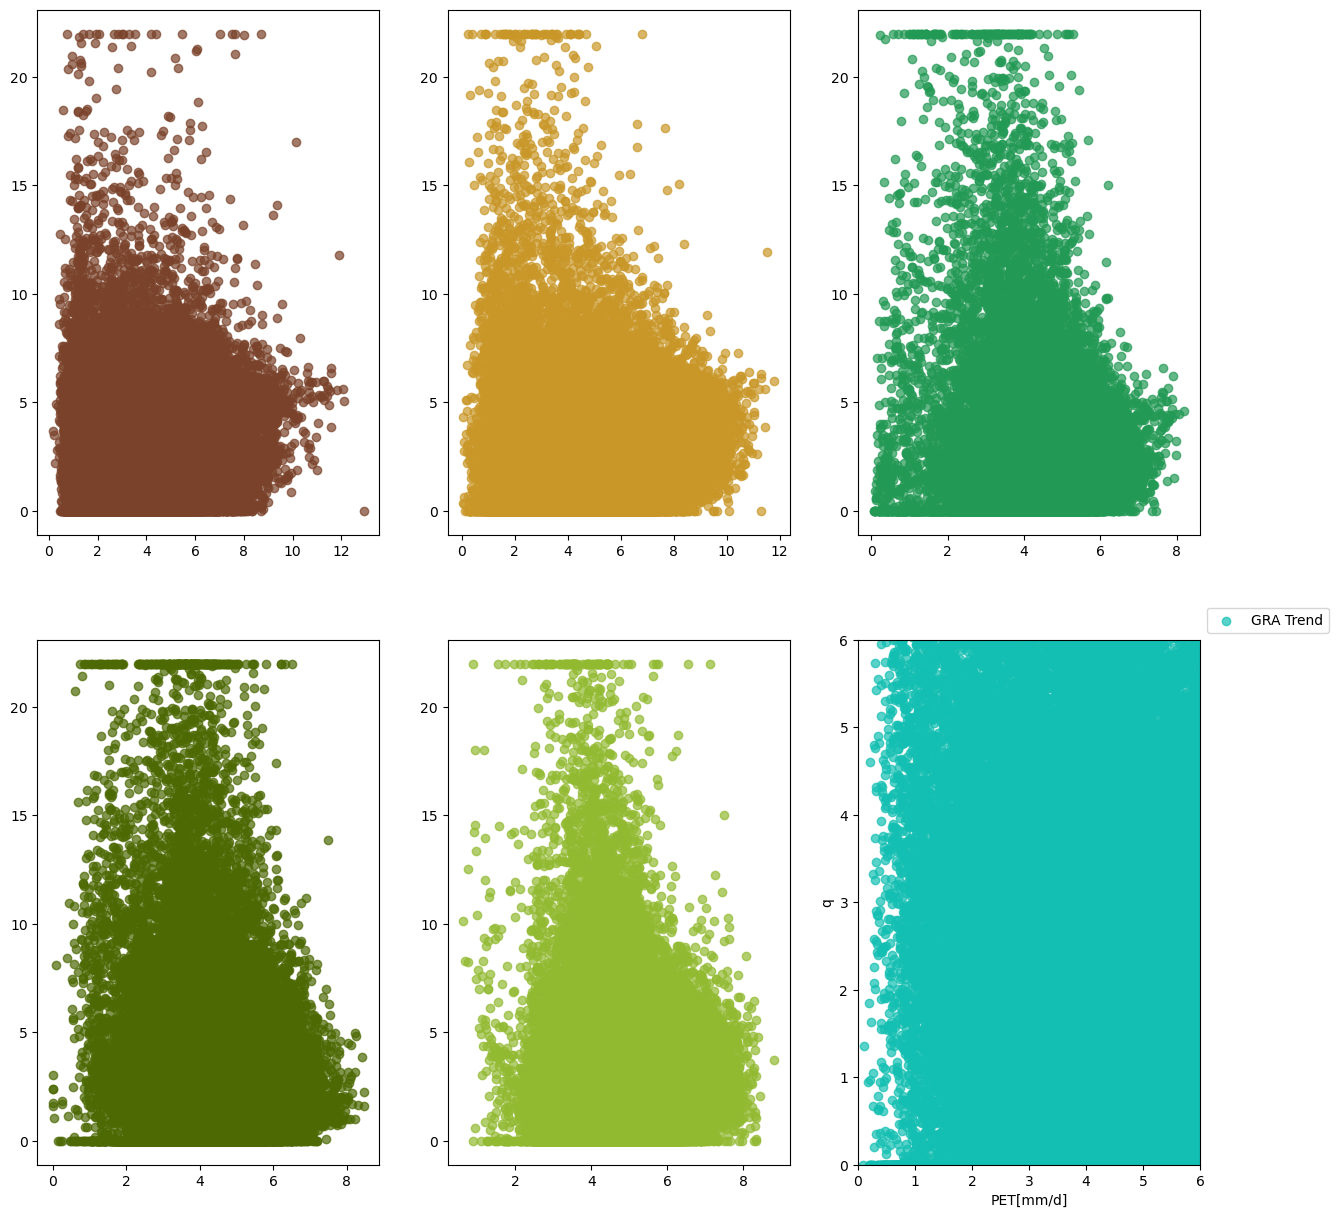

In [152]:
plot_scatter(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="pet", x_label="PET[mm/d]", y_varname="q_q", y_label="q", x_max=6, y_max=6)

In [157]:
plot_scatter(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="avg_sm", x_label="average soil moisture", y_varname="q_q", y_label="q", x_max=0.6, y_max=6)

In [154]:

def plot_kde(target_df, quantile, category, color, x_varname, x_label, y_varname, y_label, x_max, y_max):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten() 
    stats_dict = {}

    # Calculate median and 90% confidence intervals for each vegetation class
    for i, category in enumerate(categories):
        subset = target_df[target_df['abbreviation'] == category]
        ax = axs[i]
        # Plot the trend line
        sns.kdeplot(data=subset, x=x_varname, y=y_varname, ax=ax, fill=True)

        # Add labels and title
        ax.xlabel(x_label)
        ax.ylabel(y_label)
        ax.set_title(category)

        # Add a legend
        ax.legend(bbox_to_anchor=(1, 1))
        ax.xlim(0.0, x_max)
        ax.ylim(0.0, y_max)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [156]:
filtered_df3.groupby('abbreviation').count()

Unnamed: 0  EASE_row_index  EASE_column_index  event_start  \
abbreviation                                                               
BAR                86328           86328              86328        86328   
CNM                24878           24878              24878        24878   
CRO                67172           67172              67172        67172   
CSH                  422             422                422          422   
DBF                   92              92                 92           92   
DNF                   96              96                 96           96   
ENF                   83              83                 83           83   
GRA               100899          100899             100899       100899   
MF                   183             183                183          183   
OSH                64038           64038              64038        64038   
OW                     4               4                  4            4   
SAV                46513           46513              46513        46513   
WET                   93              93                 93           93   
WSA                39033           39033              39033        39033   

              event_end    time      sm  min_sm  max_sm     pet  ...    name  \
abbreviation                                                     ...           
BAR               86328   86328   86328   86328   86328   86328  ...   86328   
CNM               24878   24878   24878   24878   24878   24878  ...   24878   
CRO               67172   67172   67172   67172   67172   67172  ...   67172   
CSH                 422     422     422     422     422     422  ...     422   
DBF                  92      92      92      92      92      92  ...      92   
DNF                  96      96      96      96      96      96  ...      96   
ENF                  83      83      83      83      83      83  ...      83   
GRA              100899  100899  100899  100899  100899  100899  ...  100899   
MF                  183     183     183     183     183     183  ...     183   
OSH               64038   64038   64038   64038   64038   64038  ...   64038   
OW                    4       4       4       4       4       4  ...       4   
SAV               46513   46513   46513   46513   46513   46513  ...   46513   
WET                  93      93      93      93      93      93  ...      93   
WSA               39033   39033   39033   39033   39033   39033  ...   39033   

              description  _diff_R2  q_k_dernormalize  q_AET/PET  sand_bins  \
abbreviation                                                                  
BAR                 86328     86328             86328      86328      86316   
CNM                 24878     24878             24878      24878      24878   
CRO                 67172     67172             67172      67172      67172   
CSH                   422       422               422        422        422   
DBF                    92        92                92         92         92   
DNF                    96        96                96         96         96   
ENF                    83        83                83         83         83   
GRA                100899    100899            100899     100899     100899   
MF                    183       183               183        183        183   
OSH                 64038     64038             64038      64038      64038   
OW                      4         4                 4          4          4   
SAV                 46513     46513             46513      46513      46513   
WET                    93        93                93         93         93   
WSA                 39033     39033             39033      39033      39033   

              ai_bins     doy  sm_range  avg_sm  
abbreviation                                     
BAR             86328   86328     86328   86328  
CNM             24748   24878     24878   24878  
CRO             67001   67172     67172   67172  
C

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


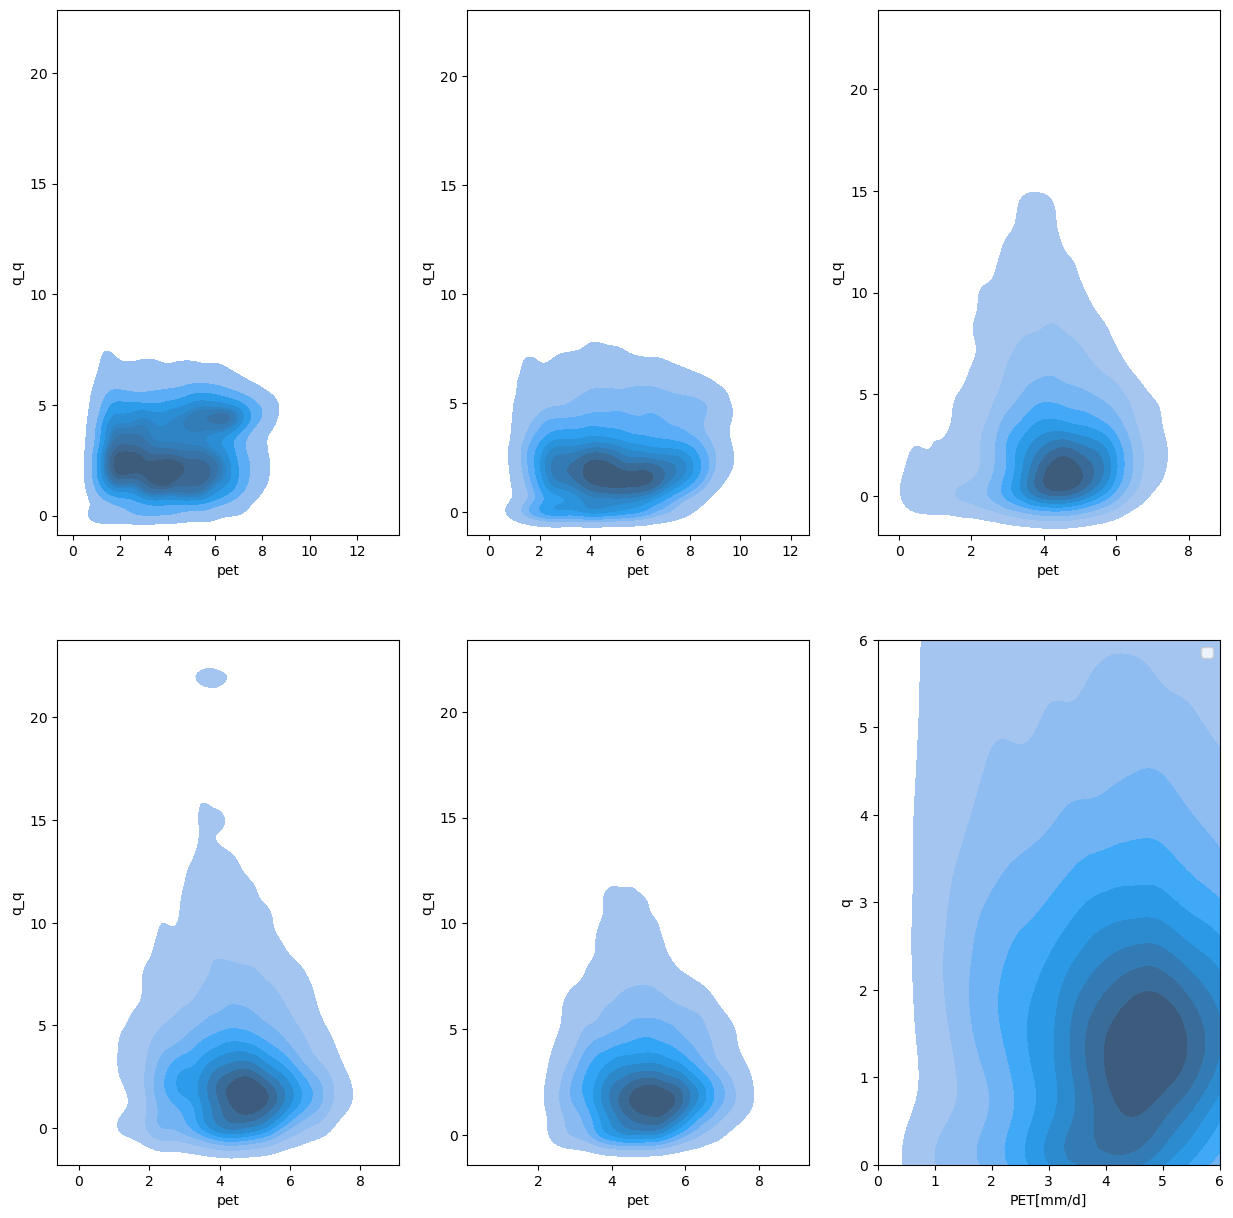

In [155]:
plot_kde(target_df=filtered_df3, quantile=33, category=vegetation_categories, color=colors, x_varname="pet", x_label="PET[mm/d]", y_varname="q_q", y_label="q", x_max=6, y_max=6)